In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from glob import glob
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import warnings
warnings.filterwarnings("ignore")

##Import any other packages you may need here

In [2]:
height, width = 15, 25
matplotlib.rcParams['figure.figsize'] = [width, height]

In [3]:
## Below is some helper code to read all of your full image filepaths into a dataframe for easier manipulation

all_xray_df = pd.read_csv('/data/Data_Entry_2017.csv')
all_xray_df.sample(3)

data_sample = pd.read_csv('sample_labels.csv')
data_sample

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y
0,00000013_005.png,Emphysema|Infiltration|Pleural_Thickening|Pneu...,5,13,060Y,M,AP,3056,2544,0.139000,0.139000
1,00000013_026.png,Cardiomegaly|Emphysema,26,13,057Y,M,AP,2500,2048,0.168000,0.168000
2,00000017_001.png,No Finding,1,17,077Y,M,AP,2500,2048,0.168000,0.168000
3,00000030_001.png,Atelectasis,1,30,079Y,M,PA,2992,2991,0.143000,0.143000
4,00000032_001.png,Cardiomegaly|Edema|Effusion,1,32,055Y,F,AP,2500,2048,0.168000,0.168000
...,...,...,...,...,...,...,...,...,...,...,...
5601,00030712_000.png,No Finding,0,30712,058Y,M,PA,2021,2021,0.194311,0.194311
5602,00030786_005.png,Cardiomegaly|Effusion|Emphysema,5,30786,061Y,F,AP,3056,2544,0.139000,0.139000
5603,00030789_000.png,Infiltration,0,30789,052Y,F,PA,2021,2021,0.194311,0.194311
5604,00030792_000.png,No Finding,0,30792,010Y,F,PA,1775,1712,0.194311,0.194311


EDA is open-ended, and it is up to you to decide how to look at different ways to slice and dice your data. A good starting point is to look at the requirements for the FDA documentation in the final part of this project to guide (some) of the analyses you do. 

This EDA should also help to inform you of how pneumonia looks in the wild. E.g. what other types of diseases it's commonly found with, how often it is found, what ages it affects, etc. 

Note that this NIH dataset was not specifically acquired for pneumonia. So, while this is a representation of 'pneumonia in the wild,' the prevalence of pneumonia may be different if you were to take only chest x-rays that were acquired in an ER setting with suspicion of pneumonia. 

Also, **describe your findings and how will you set up the model training based on the findings.**

In [4]:
all_xray_df

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
112115,00030801_001.png,Mass|Pneumonia,1,30801,39,M,PA,2048,2500,0.168,0.168,NaN
112116,00030802_000.png,No Finding,0,30802,29,M,PA,2048,2500,0.168,0.168,NaN
112117,00030803_000.png,No Finding,0,30803,42,F,PA,2048,2500,0.168,0.168,NaN
112118,00030804_000.png,No Finding,0,30804,30,F,PA,2048,2500,0.168,0.168,NaN


In [5]:
data_sample

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y
0,00000013_005.png,Emphysema|Infiltration|Pleural_Thickening|Pneu...,5,13,060Y,M,AP,3056,2544,0.139000,0.139000
1,00000013_026.png,Cardiomegaly|Emphysema,26,13,057Y,M,AP,2500,2048,0.168000,0.168000
2,00000017_001.png,No Finding,1,17,077Y,M,AP,2500,2048,0.168000,0.168000
3,00000030_001.png,Atelectasis,1,30,079Y,M,PA,2992,2991,0.143000,0.143000
4,00000032_001.png,Cardiomegaly|Edema|Effusion,1,32,055Y,F,AP,2500,2048,0.168000,0.168000
...,...,...,...,...,...,...,...,...,...,...,...
5601,00030712_000.png,No Finding,0,30712,058Y,M,PA,2021,2021,0.194311,0.194311
5602,00030786_005.png,Cardiomegaly|Effusion|Emphysema,5,30786,061Y,F,AP,3056,2544,0.139000,0.139000
5603,00030789_000.png,Infiltration,0,30789,052Y,F,PA,2021,2021,0.194311,0.194311
5604,00030792_000.png,No Finding,0,30792,010Y,F,PA,1775,1712,0.194311,0.194311


In [6]:
all_xray_df.describe()

,Follow-up #,Patient ID,Patient Age,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
count,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000,0.0
mean,8.573751,14346.381743,46.901463,2646.078844,2486.438842,0.155649,0.155649,NaN
std,15.406320,8403.876972,16.839923,341.246429,401.268227,0.016174,0.016174,NaN
min,0.000000,1.000000,1.000000,1143.000000,966.000000,0.115000,0.115000,NaN
25%,0.000000,7310.750000,35.000000,2500.000000,2048.000000,0.143000,0.143000,NaN
50%,3.000000,13993.000000,49.000000,2518.000000,2544.000000,0.143000,0.143000,NaN
75%,10.000000,20673.000000,59.000000,2992.000000,2991.000000,0.168000,0.168000,NaN
max,183.000000,30805.000000,414.000000,3827.000000,4715.000000,0.198800,0.198800,NaN


In [7]:
all_xray_df = all_xray_df.loc[all_xray_df['Patient Age'] <= 100] # Dropping the outliers
all_xray_df['Patient Gender'] = all_xray_df['Patient Gender'].apply(
    lambda x: 0 if x == 'M' else 1) # One hot encoding patient age
all_xray_df['View Position'] = all_xray_df['View Position'].apply(
    lambda x: 0 if x == 'PA' else 1) # One hot encoding view position

all_xray_df

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,Cardiomegaly,0,1,58,0,0,2682,2749,0.143,0.143,NaN
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,0,0,2894,2729,0.143,0.143,NaN
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,0,0,2500,2048,0.168,0.168,NaN
3,00000002_000.png,No Finding,0,2,81,0,0,2500,2048,0.171,0.171,NaN
4,00000003_000.png,Hernia,0,3,81,1,0,2582,2991,0.143,0.143,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
112115,00030801_001.png,Mass|Pneumonia,1,30801,39,0,0,2048,2500,0.168,0.168,NaN
112116,00030802_000.png,No Finding,0,30802,29,0,0,2048,2500,0.168,0.168,NaN
112117,00030803_000.png,No Finding,0,30803,42,1,0,2048,2500,0.168,0.168,NaN
112118,00030804_000.png,No Finding,0,30804,30,1,0,2048,2500,0.168,0.168,NaN


## *Working on `Finding Labels` feature*
(Will be addressed as *'feature of interest'* or `foe` in this section)

In [8]:
# Spliting the string values in foe to list the symptoms detected in each image

all_xray_df['Finding Labels'] = all_xray_df['Finding Labels'].apply(lambda x: x.split('|'))
all_xray_df

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,[Cardiomegaly],0,1,58,0,0,2682,2749,0.143,0.143,NaN
1,00000001_001.png,"[Cardiomegaly, Emphysema]",1,1,58,0,0,2894,2729,0.143,0.143,NaN
2,00000001_002.png,"[Cardiomegaly, Effusion]",2,1,58,0,0,2500,2048,0.168,0.168,NaN
3,00000002_000.png,[No Finding],0,2,81,0,0,2500,2048,0.171,0.171,NaN
4,00000003_000.png,[Hernia],0,3,81,1,0,2582,2991,0.143,0.143,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
112115,00030801_001.png,"[Mass, Pneumonia]",1,30801,39,0,0,2048,2500,0.168,0.168,NaN
112116,00030802_000.png,[No Finding],0,30802,29,0,0,2048,2500,0.168,0.168,NaN
112117,00030803_000.png,[No Finding],0,30803,42,1,0,2048,2500,0.168,0.168,NaN
112118,00030804_000.png,[No Finding],0,30804,30,1,0,2048,2500,0.168,0.168,NaN


In [9]:
# Extracting the unique symptoms from the foe

all_symptoms = all_xray_df['Finding Labels'].explode().unique()
print("List of symptoms described in the dataset:\n\n", all_symptoms)
print('\n')
print("Number of symptoms described in the dataset: ",len(all_symptoms))

List of symptoms described in the dataset:

 ['Cardiomegaly' 'Emphysema' 'Effusion' 'No Finding' 'Hernia'
 'Infiltration' 'Mass' 'Nodule' 'Atelectasis' 'Pneumothorax'
 'Pleural_Thickening' 'Pneumonia' 'Fibrosis' 'Edema' 'Consolidation']


Number of symptoms described in the dataset:  15


In [10]:
# One Hot Encoding the symptoms

for s in all_symptoms:
    all_xray_df[s] = all_xray_df['Finding Labels'].apply(lambda x: 1 if s in x else 0)
all_xray_df.sample(1)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,...,Infiltration,Mass,Nodule,Atelectasis,Pneumothorax,Pleural_Thickening,Pneumonia,Fibrosis,Edema,Consolidation
70765,00017451_000.png,[No Finding],0,17451,41,1,1,2500,2048,0.168,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# Rearranging the columns of the dataframe to get the `No Finding` value of symptom to the last.
# It is not useful in studying the inter-relations between symptoms.

cols = all_xray_df.columns.tolist()
cols.remove('No Finding')
cols.append('No Finding')
all_xray_df = all_xray_df[cols]
all_xray_df.sample(1)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,...,Mass,Nodule,Atelectasis,Pneumothorax,Pleural_Thickening,Pneumonia,Fibrosis,Edema,Consolidation,No Finding
43184,00011143_006.png,[Emphysema],6,11143,66,0,0,2992,2991,0.143,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# Getting the count (or distribution) of the symptoms in foe with respect to number of images.

symptoms_value_counts = all_xray_df['Finding Labels'].explode()
symptoms_value_counts.value_counts(normalize=True)

No Finding            0.426472
Infiltration          0.140556
Effusion              0.094095
Atelectasis           0.081672
Nodule                0.044737
Mass                  0.040836
Pneumothorax          0.037458
Consolidation         0.032978
Pleural_Thickening    0.023912
Cardiomegaly          0.019616
Emphysema             0.017779
Edema                 0.016267
Fibrosis              0.011914
Pneumonia             0.010105
Hernia                0.001604
Name: Finding Labels, dtype: float64

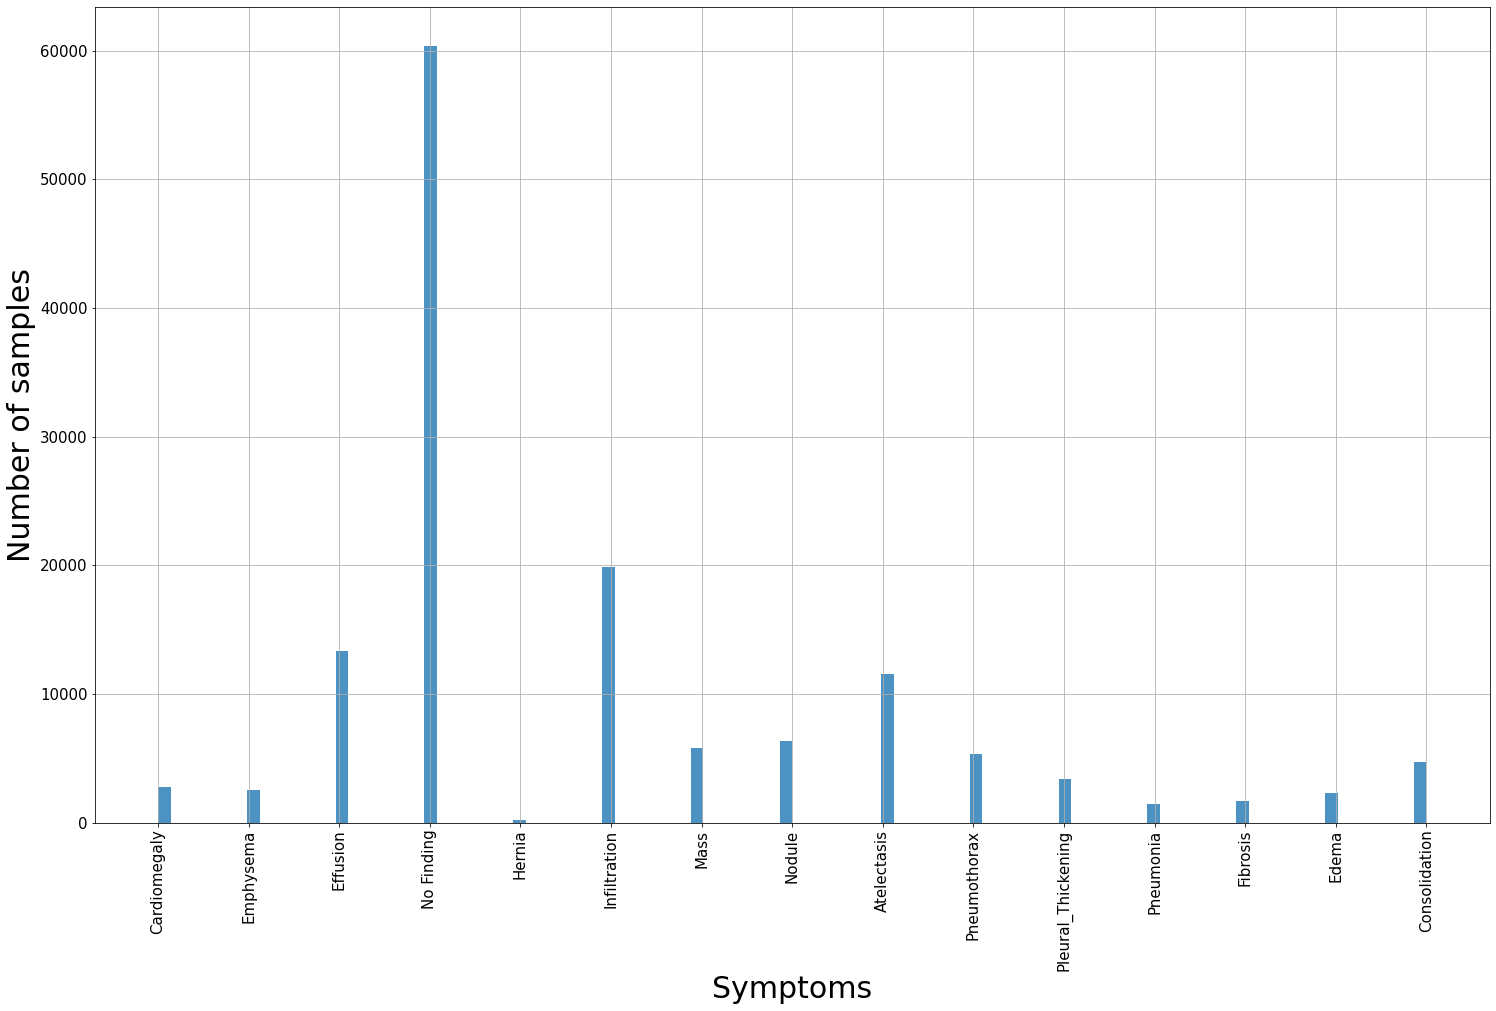

In [13]:
# Plotting the distribution determined in the previous cell

symptoms_value_counts.hist(bins=100, alpha=0.8)
_ = plt.xticks(rotation=90, fontsize=15)
_ = plt.yticks(fontsize=15)
_ = plt.xlabel('Symptoms', fontsize=30)
_ = plt.ylabel('Number of samples', fontsize=30)

**Most of the images were found to show no symptoms, which accounts to 42.6% of the whole dataset.**

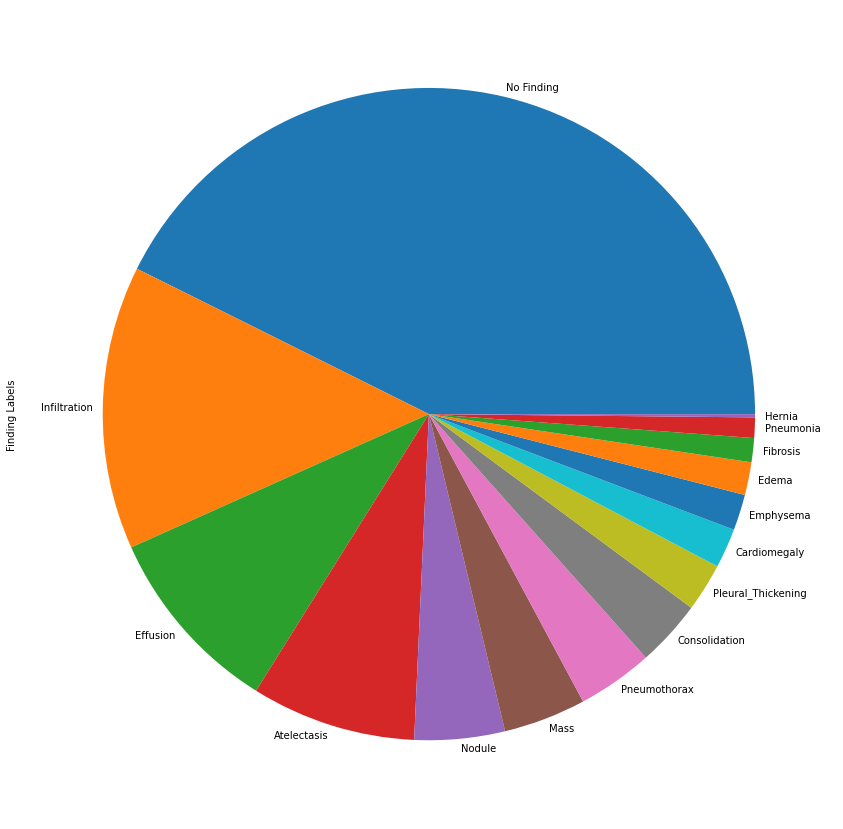

In [14]:
# Plotting a pie chart to get a different perspective on the distribution
_ = symptoms_value_counts.value_counts().plot.pie(figsize=(15, 15), labeldistance=1.03,)

**The most prominent symptom is infiltration while the one of our concern, pneumonia, is found in only about 1.01% of the dataset. More belligerent symptoms tends to occur less.**

In [15]:
# Taking out the part of the dataframe having the information on symptoms distribution
# to determine the co-occurence matrix

symptoms_segment = all_xray_df.iloc[:, 12:-2] # Ignoring 'No Finding' symptom.
symptoms_segment

,Cardiomegaly,Emphysema,Effusion,Hernia,Infiltration,Mass,Nodule,Atelectasis,Pneumothorax,Pleural_Thickening,Pneumonia,Fibrosis,Edema
0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
112115,0,0,0,0,0,1,0,0,0,0,1,0,0
112116,0,0,0,0,0,0,0,0,0,0,0,0,0
112117,0,0,0,0,0,0,0,0,0,0,0,0,0
112118,0,0,0,0,0,0,0,0,0,0,0,0,0


In [16]:
# Calculating the co-occurence matrix for symptoms

co_occurence_matrix = symptoms_segment.T.dot(symptoms_segment)

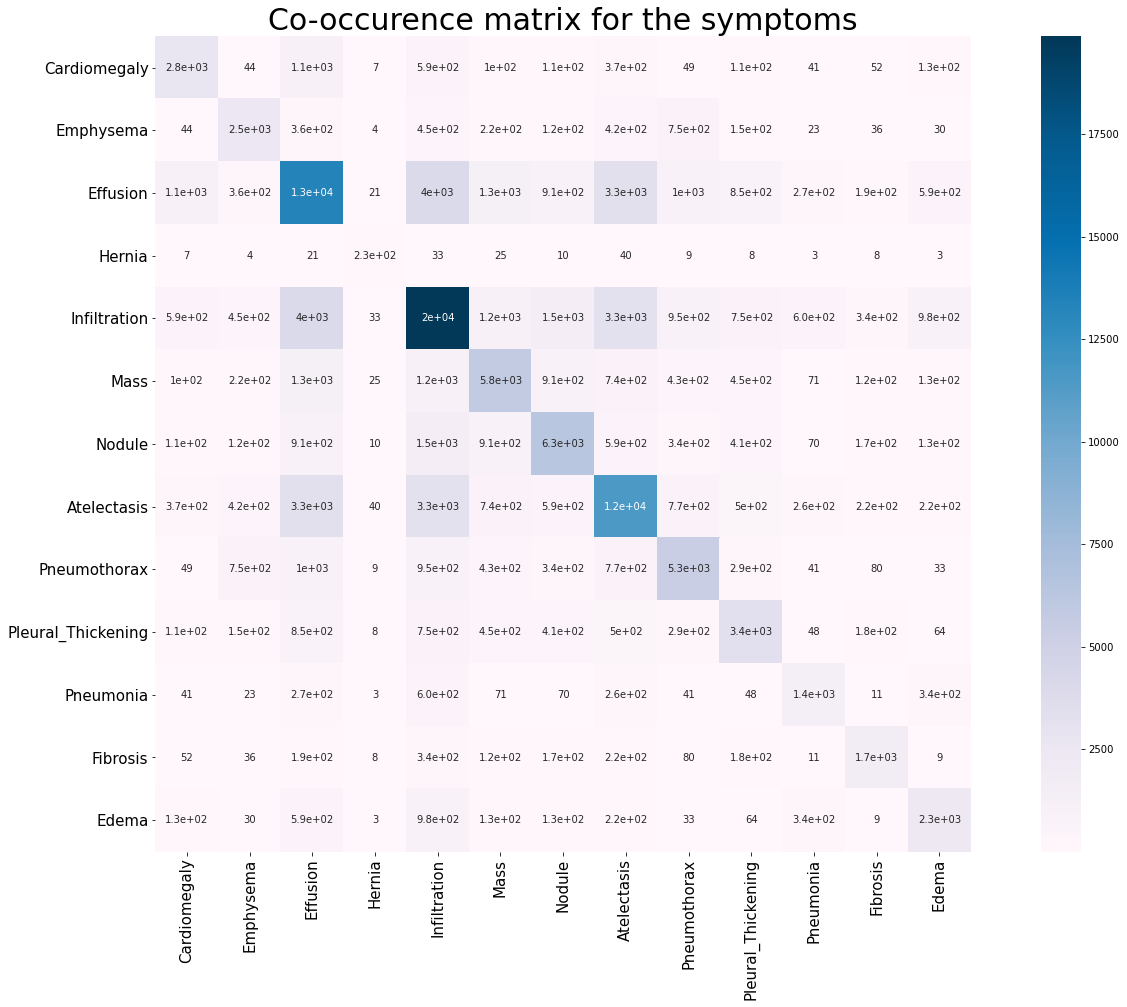

In [17]:
# Plotting the co-occurence matrix

_ = sns.heatmap(co_occurence_matrix, cmap='PuBu', annot=True, square=True)
_ = plt.xticks(fontsize=15)
_ = plt.yticks(fontsize=15)
_ = plt.title('Co-occurence matrix for the symptoms', fontsize=30)

**Infiltration has the maximum tendency to co-occur with other symptoms followed by effusion and Atelectasis. Pneumonia tends to deviate from this, with comparatively lower patients to share it along with other symptoms.**

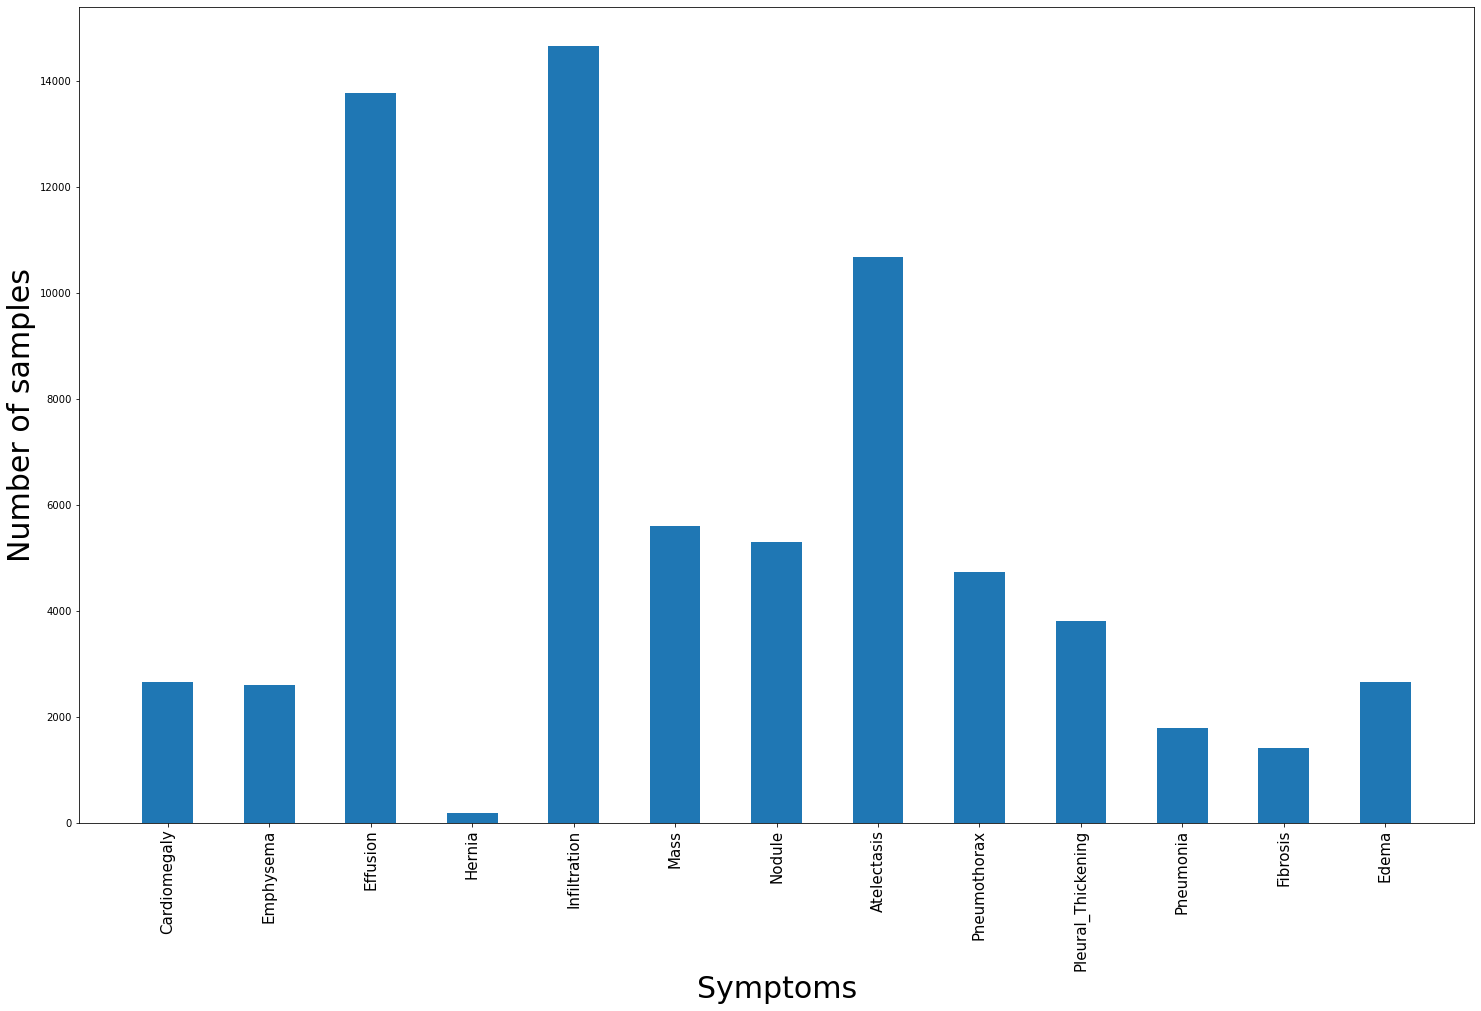

In [18]:
# Counting the cases for each symptom excluding itself occuring alone.

symptoms_tendency = co_occurence_matrix.sum(axis=0)
symptoms_tendency = dict(symptoms_tendency - np.diagonal(co_occurence_matrix))
_ = plt.bar(symptoms_tendency.keys(), symptoms_tendency.values(), width=0.5)
_ = plt.xticks(rotation=90, fontsize=15)
_ = plt.xlabel('Symptoms', fontsize=30)
_ = plt.ylabel('Number of samples', fontsize=30)

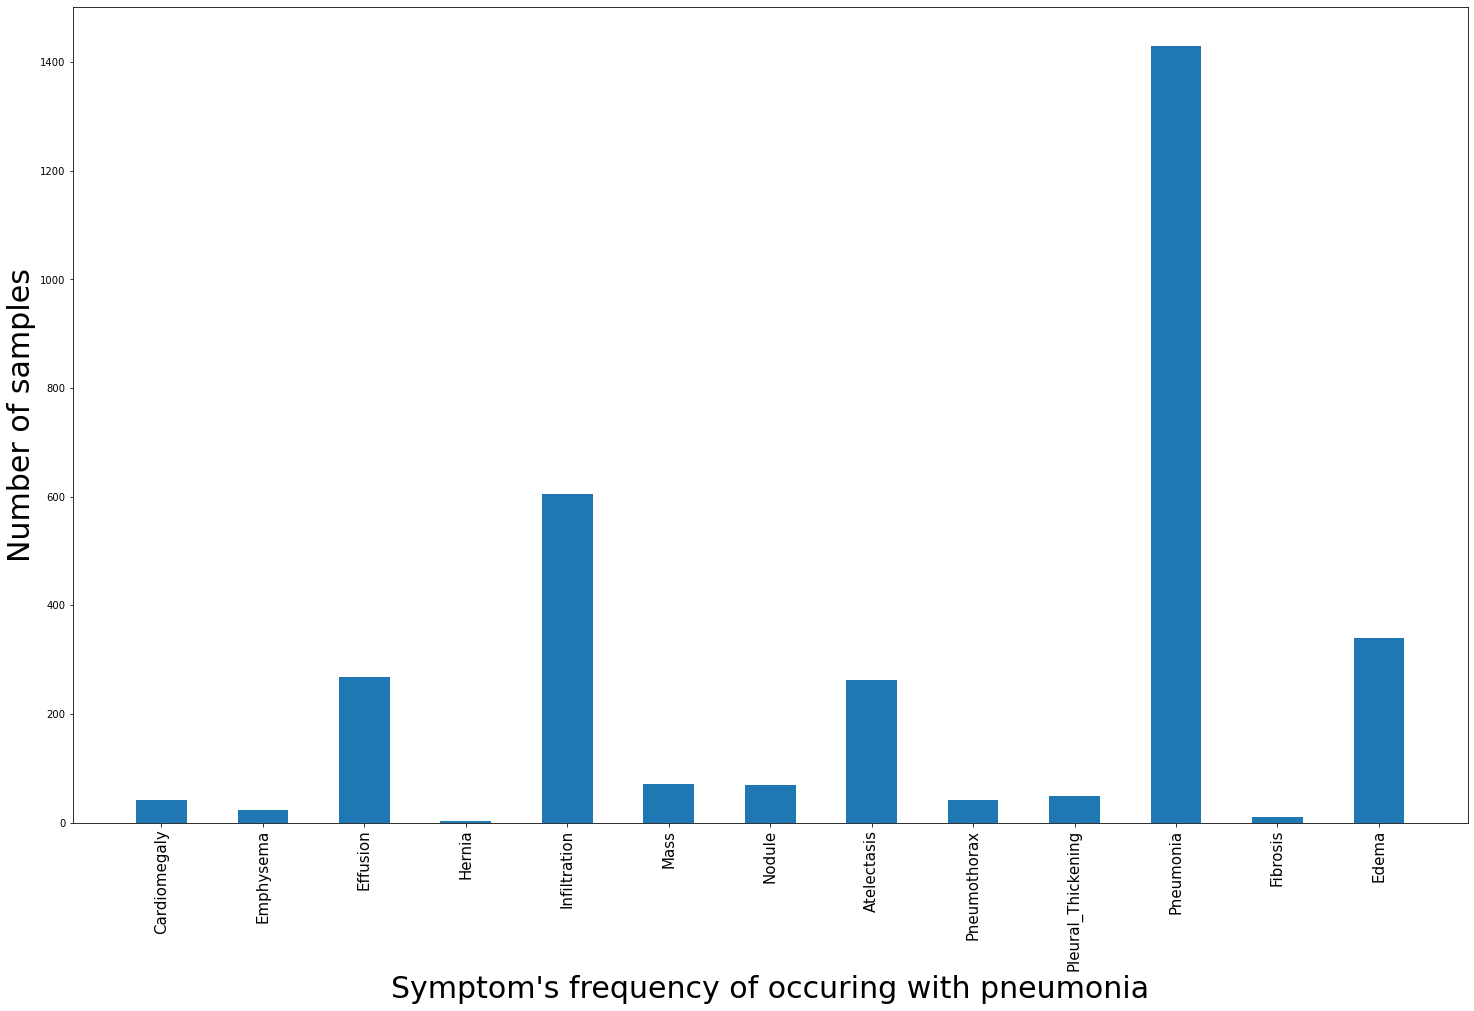

In [19]:
# Taking out the 'pneumonia' column out of the co-occurence matrix to study its relation with other symptoms

pneumonia_corr = dict(co_occurence_matrix.Pneumonia)
_ = plt.bar(*zip(*pneumonia_corr.items()), width=0.5)
y = plt.xticks(rotation = 90, fontsize=15)
_ = plt.xlabel('Symptom\'s frequency of occuring with pneumonia', fontsize=30)
_ = plt.ylabel('Number of samples', fontsize=30)

**Major symptoms to co-occur with pneumonia are: Infiltration, Edema, Effusion and Atelectasis. Although there are some cases where patients showed all the symptoms along with pneumonia, but that accounts to very low portion of the dataset, about 0.3%**

In [20]:
# Counting the number of cases with and without pneumonia

pneumonia_count = pd.DataFrame(all_xray_df.Pneumonia.value_counts()).T
pneumonia_count.rename(columns={0: 'absent', 1: 'present'}, inplace=True)
pneumonia_count['total'] = pneumonia_count.sum(axis=1)
pneumonia_count

,absent,present,total
Pneumonia,110674,1430,112104


In [21]:
all_xray_df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,...,Mass,Nodule,Atelectasis,Pneumothorax,Pleural_Thickening,Pneumonia,Fibrosis,Edema,Consolidation,No Finding
0,00000001_000.png,[Cardiomegaly],0,1,58,0,0,2682,2749,0.143,...,0,0,0,0,0,0,0,0,0,0
1,00000001_001.png,"[Cardiomegaly, Emphysema]",1,1,58,0,0,2894,2729,0.143,...,0,0,0,0,0,0,0,0,0,0
2,00000001_002.png,"[Cardiomegaly, Effusion]",2,1,58,0,0,2500,2048,0.168,...,0,0,0,0,0,0,0,0,0,0
3,00000002_000.png,[No Finding],0,2,81,0,0,2500,2048,0.171,...,0,0,0,0,0,0,0,0,0,1
4,00000003_000.png,[Hernia],0,3,81,1,0,2582,2991,0.143,...,0,0,0,0,0,0,0,0,0,0


## *Working on `Follow-up #` feature*
(Will be addressed as *'feature of interest'* or `foe` in this section)

In [22]:
# Function to count positive and negative cases of pneumonia in a dataset

def pneu_count(x):
    cases = []
    vc = x.Pneumonia.value_counts()
    try:
        n = vc[0]
    except KeyError:
        n = 0
    try:
        p = vc[1]
    except KeyError:
        p = 0
    cases.append(n)
    cases.append(p)
    
    return cases

In [23]:
# Grouping the samples according to the feature 'Follow-up #'

grouped_pneu_follow = all_xray_df.groupby(['Follow-up #'])

In [24]:
map_follow_pneu = dict(grouped_pneu_follow.apply(pneu_count))

In [25]:
x_axis = map_follow_pneu.keys()
y_negative = [v[0] for v in map_follow_pneu.values()]
y_positive = [v[1] for v in map_follow_pneu.values()]

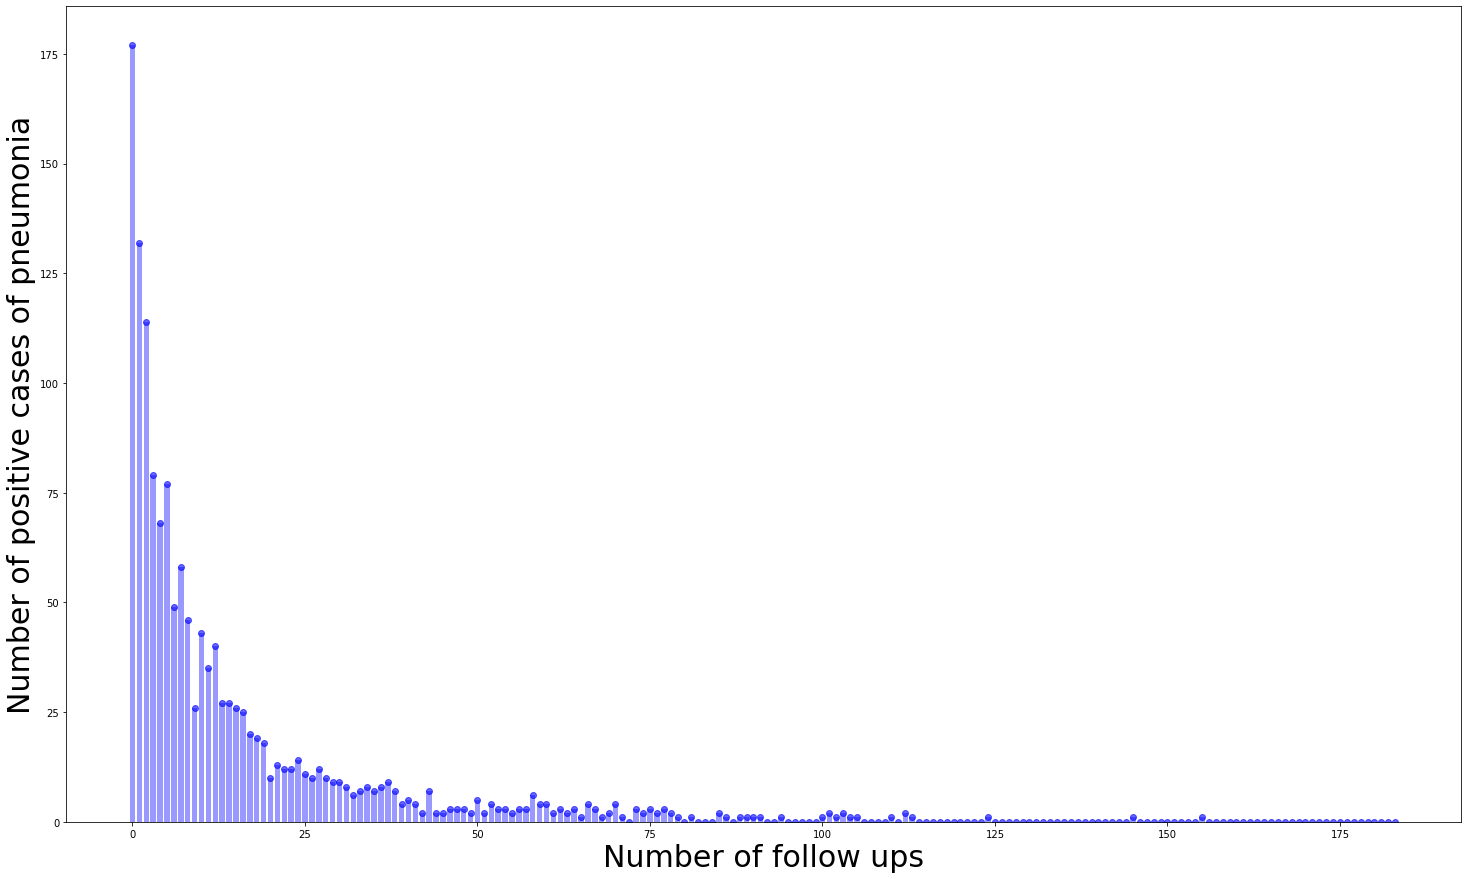

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111)
_ = ax.bar(x_axis, y_positive, color='blue', alpha=0.4)
_ = ax.scatter(x_axis, y_positive, color='blue', alpha=0.6)
_ = plt.xlabel('Number of follow ups', fontsize=30)
_ = plt.ylabel('Number of positive cases of pneumonia', fontsize=30)

**Patients who received follow-ups lowers down the risk of having pneumonia; while the ones who didn't, showed positive results. This can be seen from the above histogram, the red bars (positive cases) tends to lie in the left region of the graph, i.e., region with lower values of follow-up. The peak at `follow-up=0` signifies the same, these patients had the highest risk of being diagoned with the disease.** 

In [27]:
pearson_corr_pneu_follow = all_xray_df['Follow-up #'].corr(all_xray_df['Pneumonia'], method='pearson')
print('Pearson Correlation between features pneumonia and follow-ups is: ', pearson_corr_pneu_follow)

Pearson Correlation between features pneumonia and follow-ups is:  0.04327167889104761


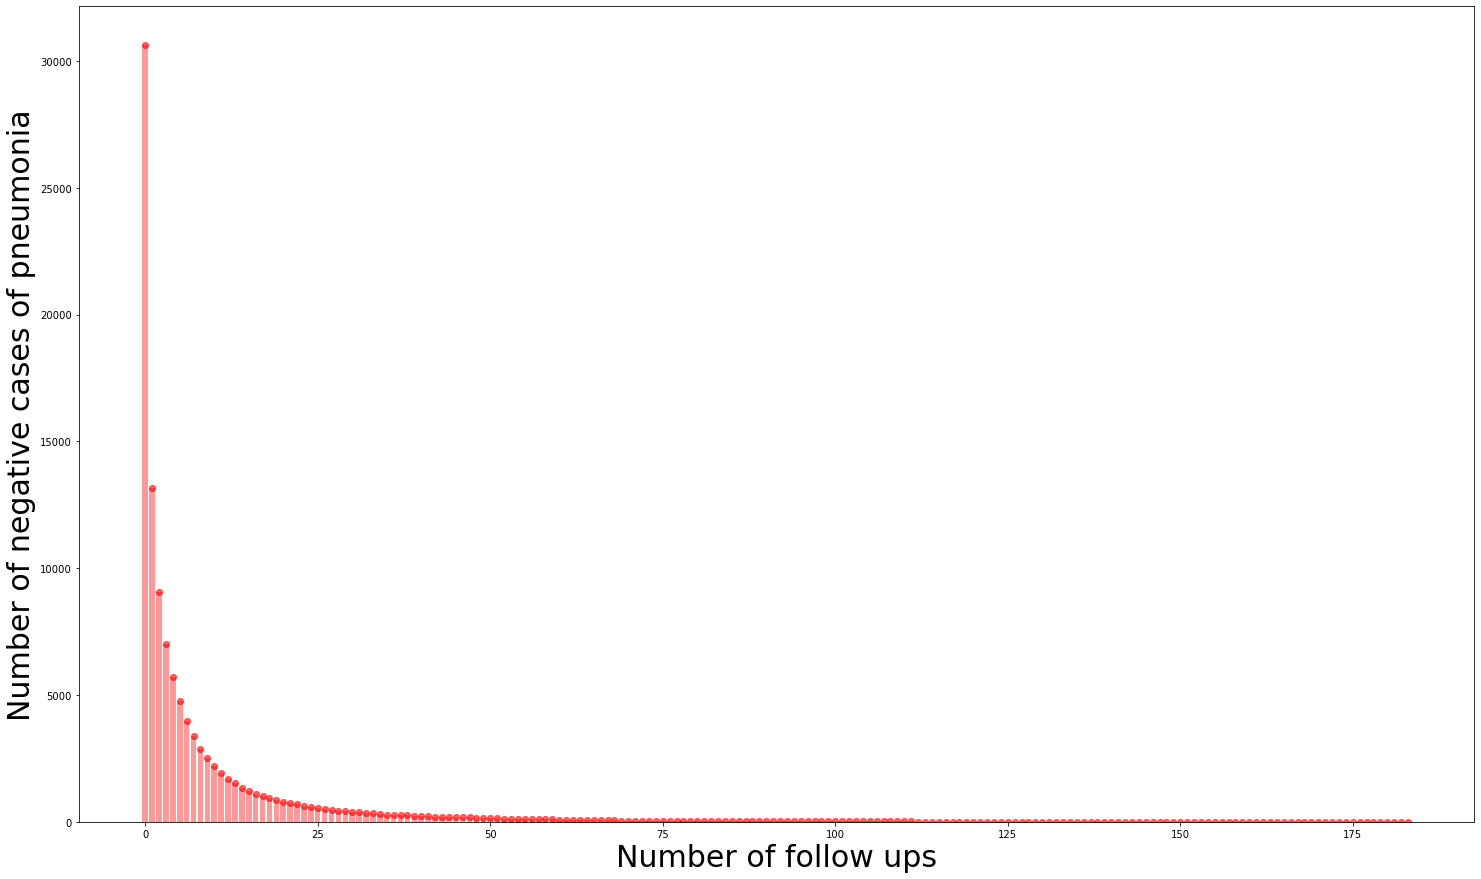

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111)
_ = ax.bar(x_axis, y_negative, color='red', alpha=0.4)
_ = ax.scatter(x_axis, y_negative, color='red', alpha=0.6)
_ = plt.xlabel('Number of follow ups', fontsize=30)
_ = plt.ylabel('Number of negative cases of pneumonia', fontsize=30)

**Although it seems that the number of negative cases for pneumonia are decreasing with the increase in follow-ups, but that's misleading to assume because the dataset also comprises of other diseases. So even though the graph is decreasing, it might not symbolise our assumption for other symptoms. Also, this is the reason why correlation between pneumonia and follow ups is close to zero. So even though correlation value tells us that they are not significant for each other, we have proved that it's not the necessary condition. Also, the correlation value is found using Pearson's formula, which looks for linear relation between the feature, which may not always be significant.**

In [29]:
all_xray_df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,...,Mass,Nodule,Atelectasis,Pneumothorax,Pleural_Thickening,Pneumonia,Fibrosis,Edema,Consolidation,No Finding
0,00000001_000.png,[Cardiomegaly],0,1,58,0,0,2682,2749,0.143,...,0,0,0,0,0,0,0,0,0,0
1,00000001_001.png,"[Cardiomegaly, Emphysema]",1,1,58,0,0,2894,2729,0.143,...,0,0,0,0,0,0,0,0,0,0
2,00000001_002.png,"[Cardiomegaly, Effusion]",2,1,58,0,0,2500,2048,0.168,...,0,0,0,0,0,0,0,0,0,0
3,00000002_000.png,[No Finding],0,2,81,0,0,2500,2048,0.171,...,0,0,0,0,0,0,0,0,0,1
4,00000003_000.png,[Hernia],0,3,81,1,0,2582,2991,0.143,...,0,0,0,0,0,0,0,0,0,0


## *Working on `Patient ID` feature*
(Will be addressed as *'feature of interest'* or `foe` in this section)

**Patient ID is a categorical type data, it not something which has any impact on the whether a patient has pneumonia or not. You could easily give a person another ID and the result would still remain the same. Although insignificant in determining the target variable, it can be used to derive some other features which holds direct relation and is more impactful towards the target variable. This has been done above during the determination of `Num Symptoms` feature, which will be analysed later.**

In [30]:
# Function to calculate the number of symptoms shown by a patient

def grouping_function(x):
    target_df = x.iloc[:, 12:-1]
    sum_of_grouped_symptoms = np.sum(target_df)
    num_symptoms = sum([1 for x in sum_of_grouped_symptoms if x > 0])
    
    return num_symptoms

In [31]:
# Grouping the data on the basis of patient ID

grouped_p_id = all_xray_df.groupby(['Patient ID'])

In [32]:
# Applying the `grouping_function` on each group of patient ID to calculate its number of symptoms
# Then converting it into a dictionary, with its keys being patients' ID's and values as the respective num
# of symptoms. This will be useful in mapping a patient's ID with its number of symptoms later

mapping_pat_num_symp = dict(grouped_p_id.apply(grouping_function))

In [33]:
# Creating a new column to store a patient's number of symptoms using the mapping dicitonary created before

all_xray_df['Num Symptoms'] = all_xray_df['Patient ID'].map(mapping_pat_num_symp)
all_xray_df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,...,Nodule,Atelectasis,Pneumothorax,Pleural_Thickening,Pneumonia,Fibrosis,Edema,Consolidation,No Finding,Num Symptoms
0,00000001_000.png,[Cardiomegaly],0,1,58,0,0,2682,2749,0.143,...,0,0,0,0,0,0,0,0,0,3
1,00000001_001.png,"[Cardiomegaly, Emphysema]",1,1,58,0,0,2894,2729,0.143,...,0,0,0,0,0,0,0,0,0,3
2,00000001_002.png,"[Cardiomegaly, Effusion]",2,1,58,0,0,2500,2048,0.168,...,0,0,0,0,0,0,0,0,0,3
3,00000002_000.png,[No Finding],0,2,81,0,0,2500,2048,0.171,...,0,0,0,0,0,0,0,0,1,0
4,00000003_000.png,[Hernia],0,3,81,1,0,2582,2991,0.143,...,0,0,0,0,0,0,0,0,0,2


In [34]:
def pneu_flag(x):
    flag = 1 in x.Pneumonia.values
    if flag == True: return 1
    else: return 0

In [35]:
map_pneu_flag = dict(grouped_p_id.apply(pneu_flag))
all_xray_df['Pneumonia_Flag'] = all_xray_df['Patient ID'].map(map_pneu_flag)

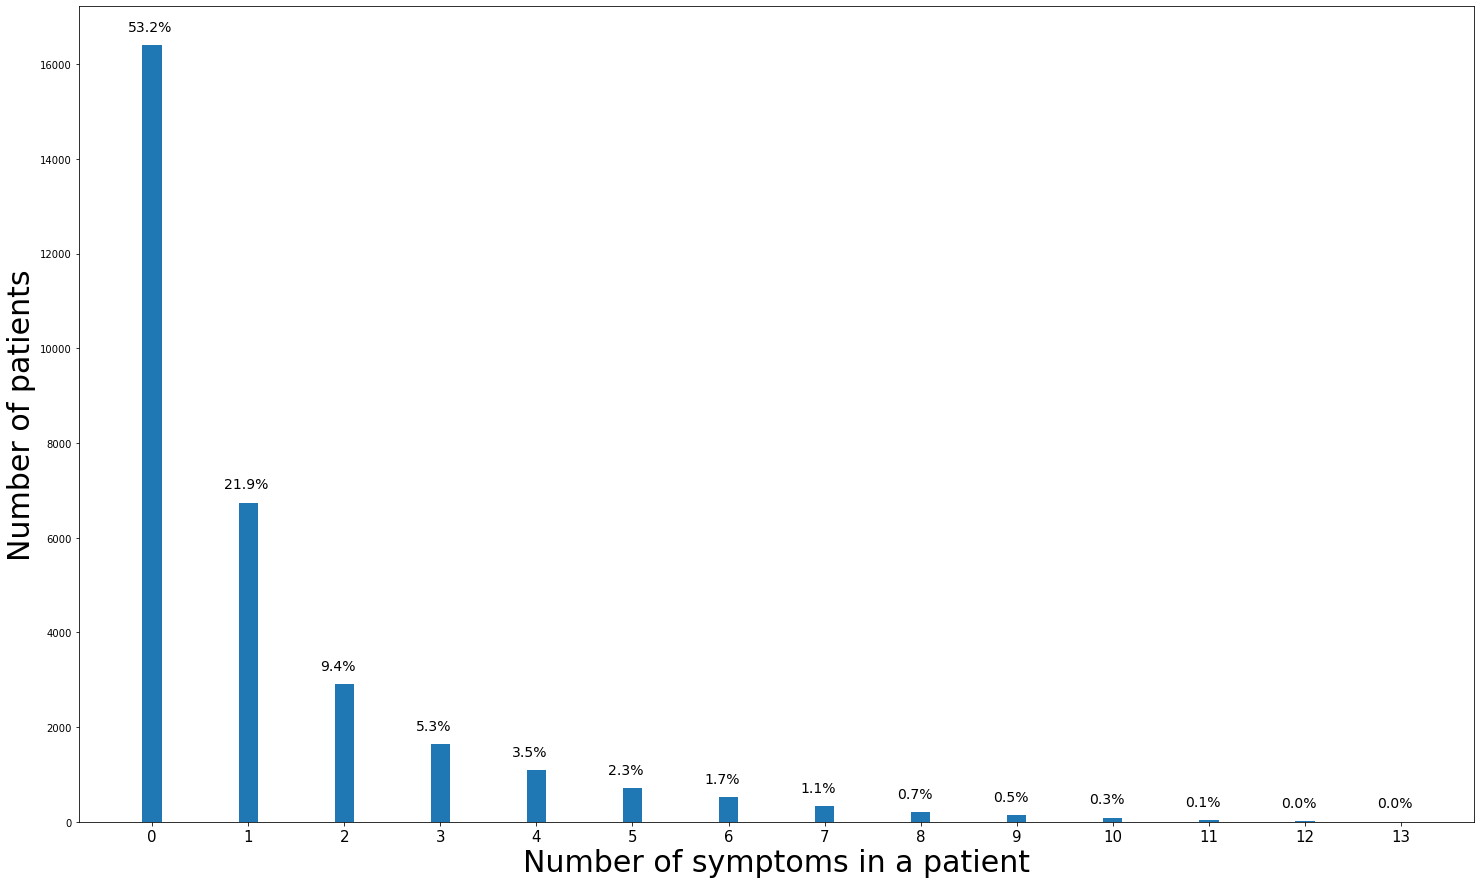

In [36]:
# Plotting the distribution of number_of_symptoms shown by patients

unique_patients = all_xray_df.drop_duplicates('Patient ID')

num_sym_vc = dict(unique_patients['Num Symptoms'].value_counts())
x_num_sym = list(num_sym_vc.keys())
y_num_sym = list(num_sym_vc.values())
plt.bar(x_num_sym, y_num_sym, width=0.2)
for i in range(len(y_num_sym)):
    plt.annotate(
        str(
            round(
                (y_num_sym[i] / sum(y_num_sym) * 100),1)
        ) + '%',
        xy=(x_num_sym[i]-0.25, y_num_sym[i]+300),
        fontsize=14)
_ = plt.xticks(x_num_sym, fontsize=15)
_ = plt.xlabel('Number of symptoms in a patient', fontsize=30)
_ = plt.ylabel('Number of patients', fontsize=30)

In [37]:
grouped_pneu_flag = unique_patients.groupby('Num Symptoms')

In [38]:
def count_pneu_patients(x):
    return [x.Pneumonia_Flag.sum(), x.shape[0]]

flag_data = dict(grouped_pneu_flag.apply(count_pneu_patients))

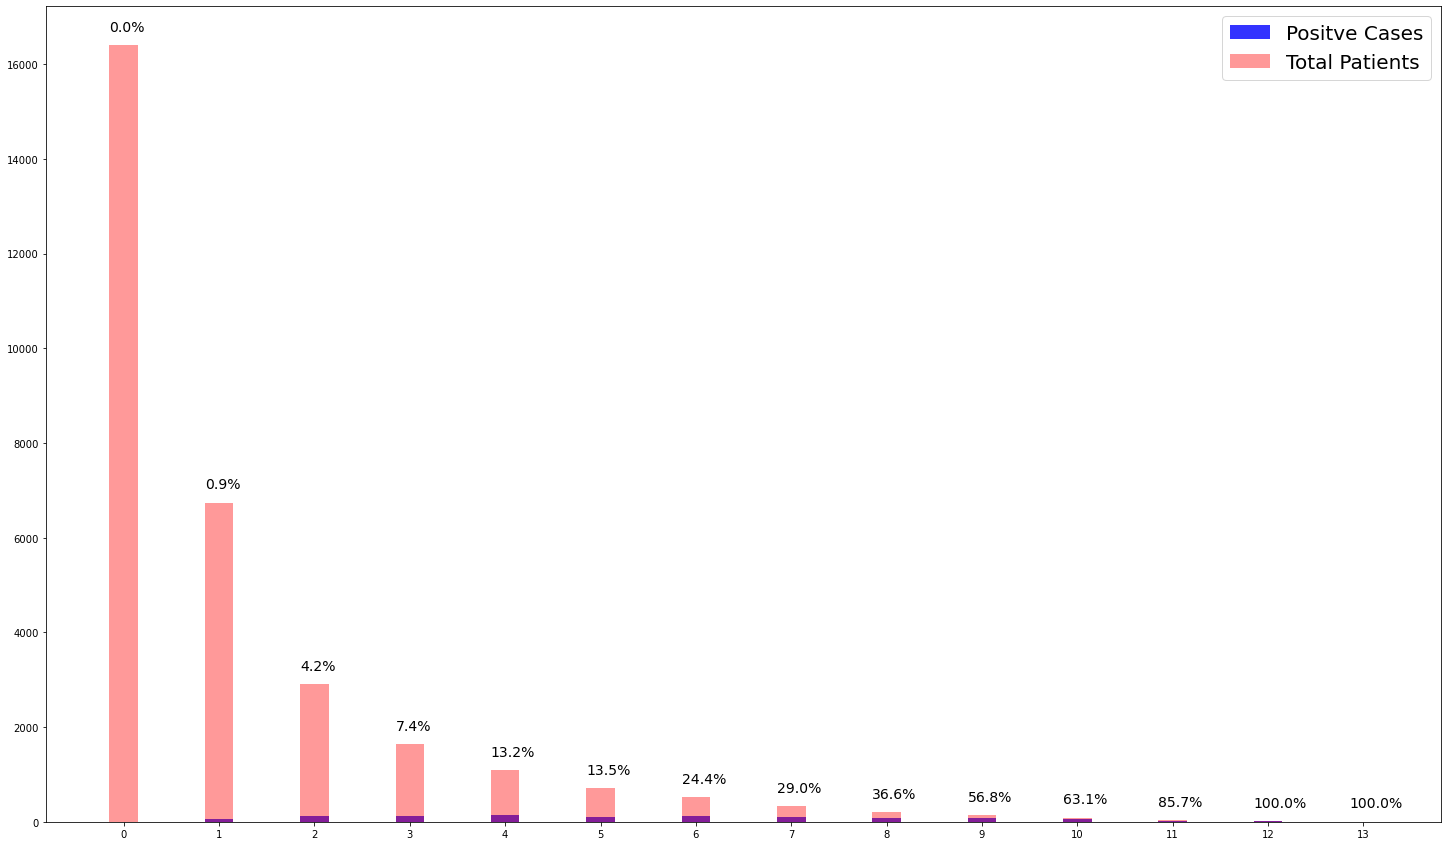

In [39]:
num_symptons = list(flag_data.keys())
pneu_counts = [v[0] for v in flag_data.values()]
total_counts = [v[1] for v in flag_data.values()]
pneu_by_total = [round(((i/j)*100), 1) for i, j in zip(pneu_counts, total_counts)]

fig = plt.figure()
ax = fig.add_subplot(111)

_ = ax.bar(num_symptons, pneu_counts, color='blue', alpha=0.8, width=0.3, label='Positve Cases')
_ = ax.bar(num_symptons, total_counts, color='red', alpha=0.4, width=0.3, label='Total Patients')
plt.xticks(num_symptons)
for i in range(len(num_symptons)):
    plt.annotate(str(pneu_by_total[i])+'%',
        xy=(num_symptons[i]-0.15, total_counts[i]+300),
        fontsize=14)
_ = plt.legend(prop={'size': 20})

**The above graph showes the relation between `number_of_symptomes` and `presence_of_pneumonia` in a patient. The x-axis is the `number_of_symptoms` and the blue y-axis is the number of patients with the presence of pneumonia while red y-axis being the total number of patients. The percentage value denotes the fraction of patients, out of total number of patients for a given number of symptoms, having pneumonia. This signifies that a patient diagnosed with multiple symptoms has more chances of developing pneumonia.**

In [40]:
pearson_coff_pneuflag_numsym = unique_patients['Pneumonia_Flag'].corr(unique_patients['Num Symptoms'], method='pearson')
spearman_coff_pneuflag_numsym = unique_patients['Pneumonia_Flag'].corr(unique_patients['Num Symptoms'], method='spearman')

print("Pearson Correlation between presence of pneumonia and number of symptoms shown is: ", pearson_coff_pneuflag_numsym)
print("Spearman Correlation between presence of pneumonia and number of symptoms shown is: ", spearman_coff_pneuflag_numsym)

Pearson Correlation between presence of pneumonia and number of symptoms shown is:  0.4275781267455217
Spearman Correlation between presence of pneumonia and number of symptoms shown is:  0.28799912090149704


**The value of pearson correlation being a high positive value indicates that the features `number_of_symptoms` and `presence_of_pneumonia` are strongly related by linear relation with positve slope, or in other words are in monotonically increasing relation. The latter is confirmed by the positive value of spearon correlation, which describes how the variables are monotonically related. This can be visualized from the following scatter plot.**

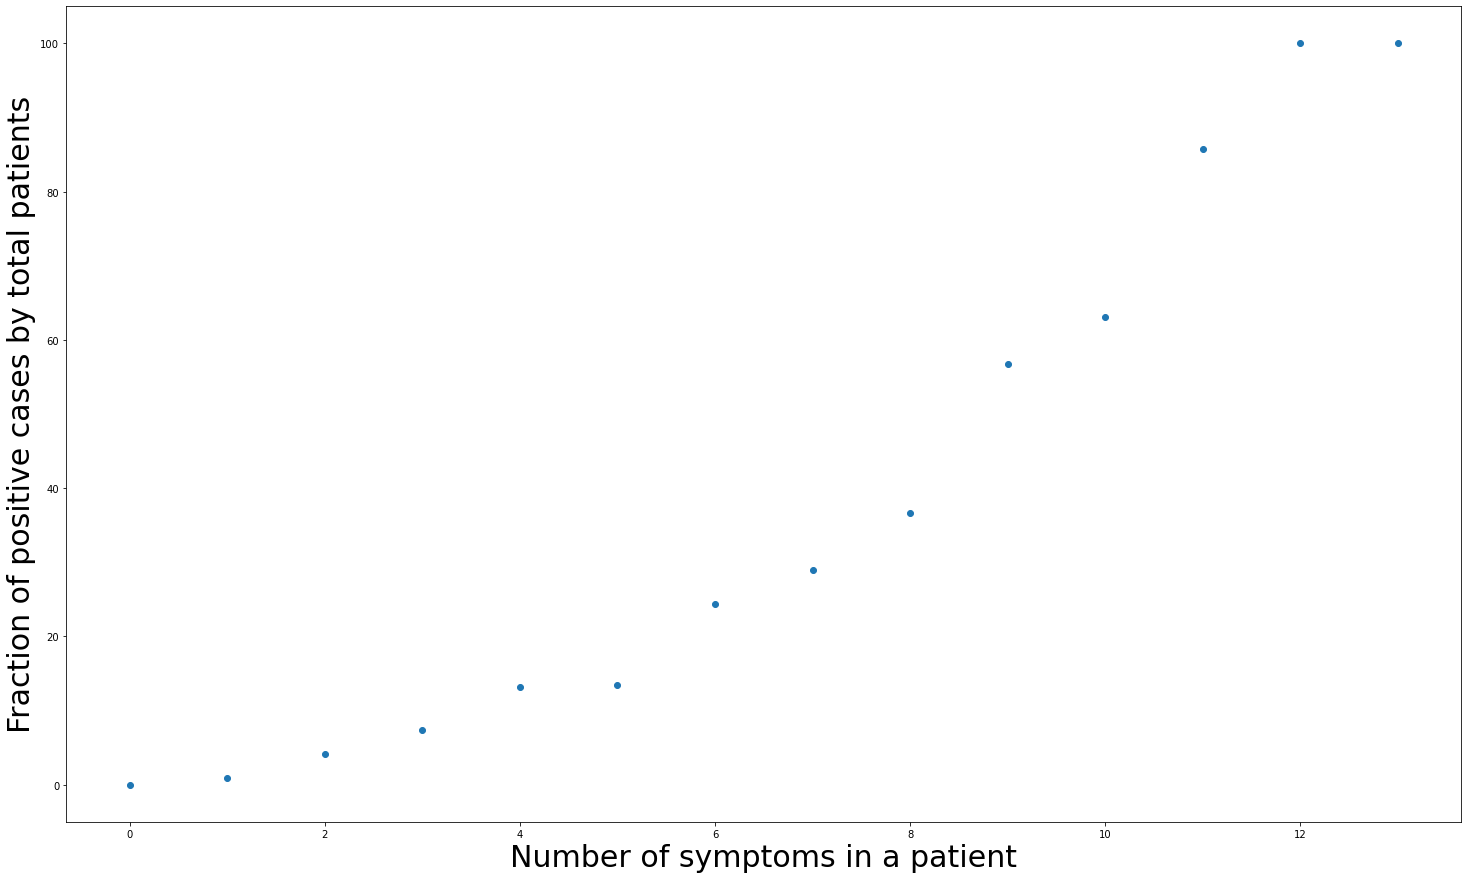

In [41]:
_ = plt.scatter(num_symptons, pneu_by_total)
_ = plt.xlabel('Number of symptoms in a patient', fontsize=30)
_ = plt.ylabel('Fraction of positive cases by total patients', fontsize=30)

**The above scatter plot justifies the values of pearson and spearman correlation values. The features `follow_up` and `presence/absence_of_pneumonia` are linearly as well as monotonically related.**

## *Working on `Patient Age` feature*
(Will be addressed as *'feature of interest'* or `foe` in this section)

Mean and standard deviation of the age of patients in the database are 46.08755924939939 and 16.69249988393185 respectively


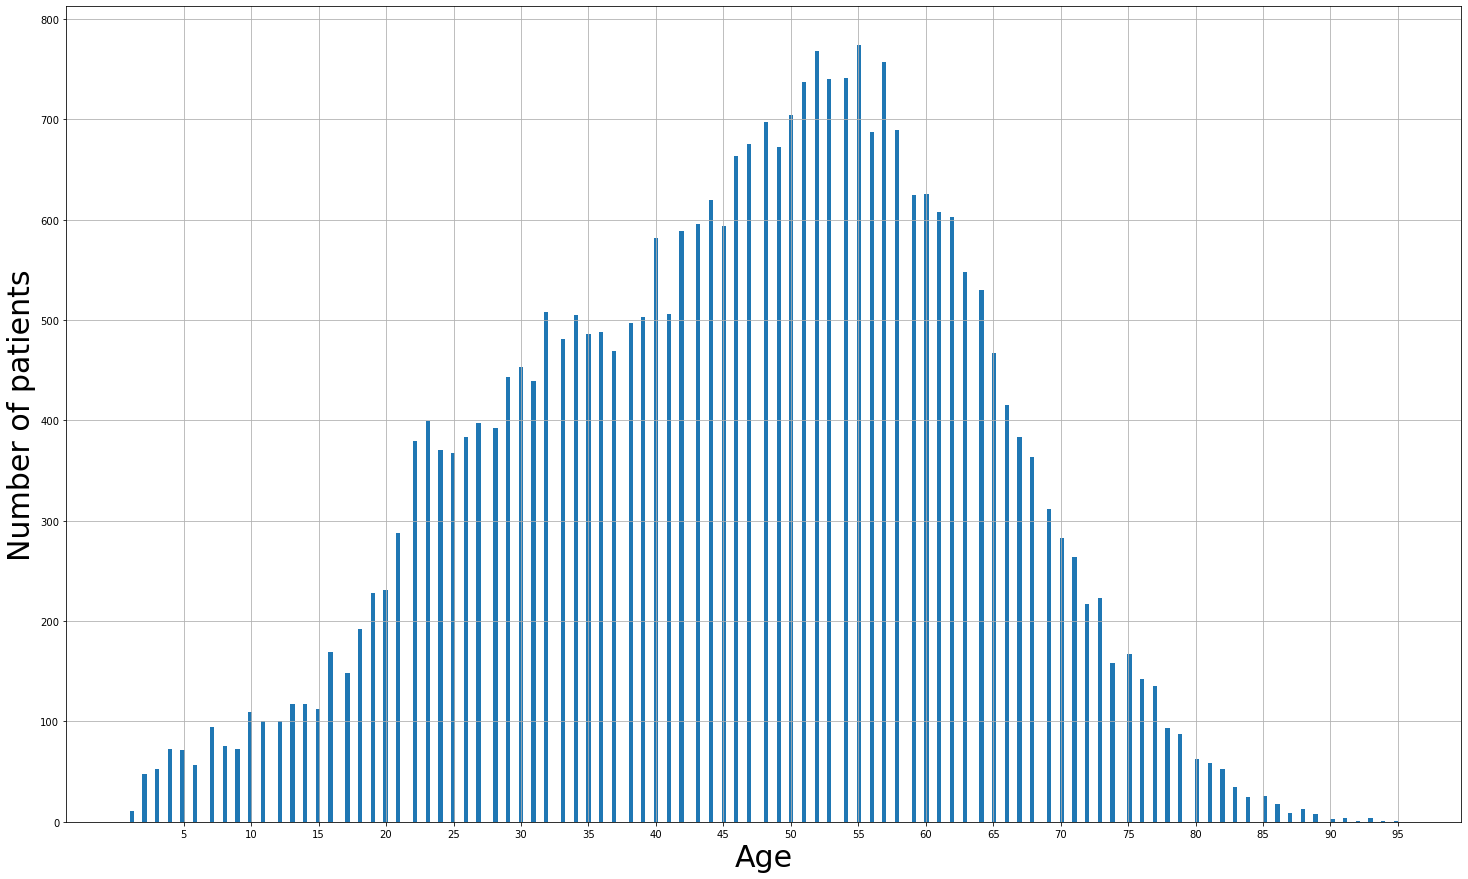

In [42]:
_ = unique_patients['Patient Age'].hist(bins=300)
_ = plt.xticks([age for age in unique_patients['Patient Age'].unique() if age % 5 == 0])
_ = plt.xlabel('Age', fontsize=30)
_ = plt.ylabel('Number of patients', fontsize=30)

print('Mean and standard deviation of the age of patients in the database are {} and {} respectively'.format(
                                                                        unique_patients['Patient Age'].mean(),
                                                                        unique_patients['Patient Age'].std()))

**Most of the patients in the dataset have their age in the range [27, 65] (assuming threshold to be 400).**

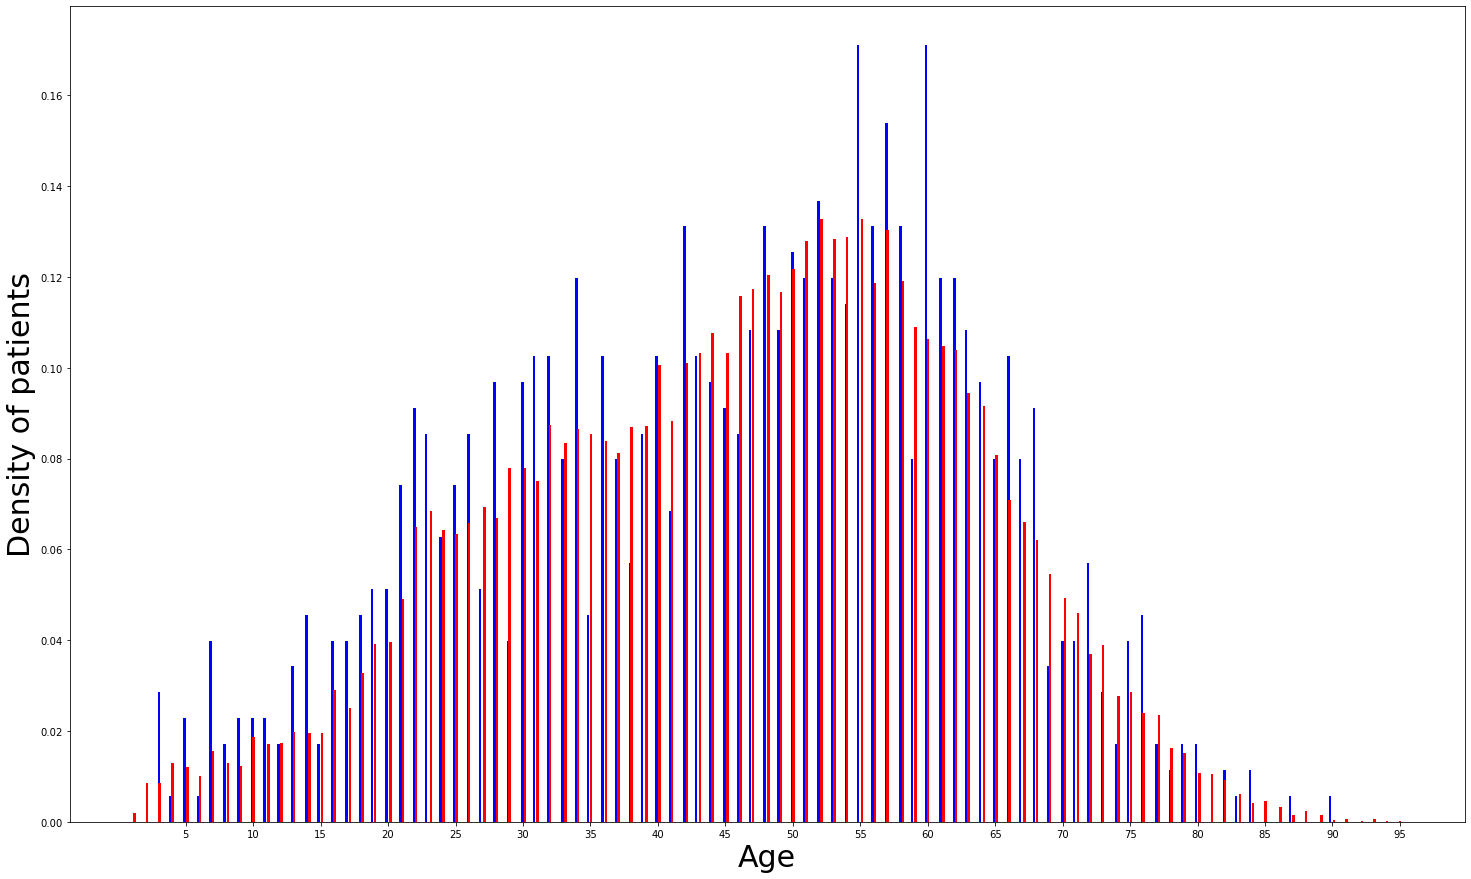

In [43]:
positive_cases = unique_patients.loc[unique_patients['Pneumonia_Flag'] == 1]
negative_cases = unique_patients.loc[unique_patients['Pneumonia_Flag'] == 0]

fig = plt.figure()
ax = fig.add_subplot(111)

_ = ax.hist(positive_cases['Patient Age'], bins=500, align='left', density=True, color='blue')
_ = ax.hist(negative_cases['Patient Age'], bins=500, align='right', density=True, color='red')
_ = plt.xticks([age for age in unique_patients['Patient Age'].unique() if age % 5 == 0])
_ = plt.xlabel('Age', fontsize=30)
_ = plt.ylabel('Density of patients', fontsize=30)

In [44]:
print('Mean and standard deviation of the age of patients with pneumonia are {} and {} respectively'.format(
                                                                        positive_cases['Patient Age'].mean(),
                                                                        positive_cases['Patient Age'].std()))
print('Mean and standard deviation of the age of patients without pneumonia are {} and {} respectively'.format(
                                                                        negative_cases['Patient Age'].mean(),
                                                                        negative_cases['Patient Age'].std()))

Mean and standard deviation of the age of patients with pneumonia are 45.35019841269841 and 17.534626827918437 respectively
Mean and standard deviation of the age of patients without pneumonia are 46.11250587366584 and 16.663002531111957 respectively


**As can be seen from the above graph, the distribution of age for patients with and without pneumonia are aproximately the same. This indicates that age is not a very impactful factor to determine the presense of pneumonia, other than the fact that most of the positive cases lies in the age range [20, 70] (approximately, for threshold of 50%). Had age been a very good decisive factor, we would have seen a more sensitive distribution of age towards the presence of pneumonia, which would also be very different than the distribuiton of age towards the negative cases. This is further verfied in the following cells.**

In [45]:
map_age_pneu = dict(unique_patients.groupby('Patient Age').apply(count_pneu_patients))

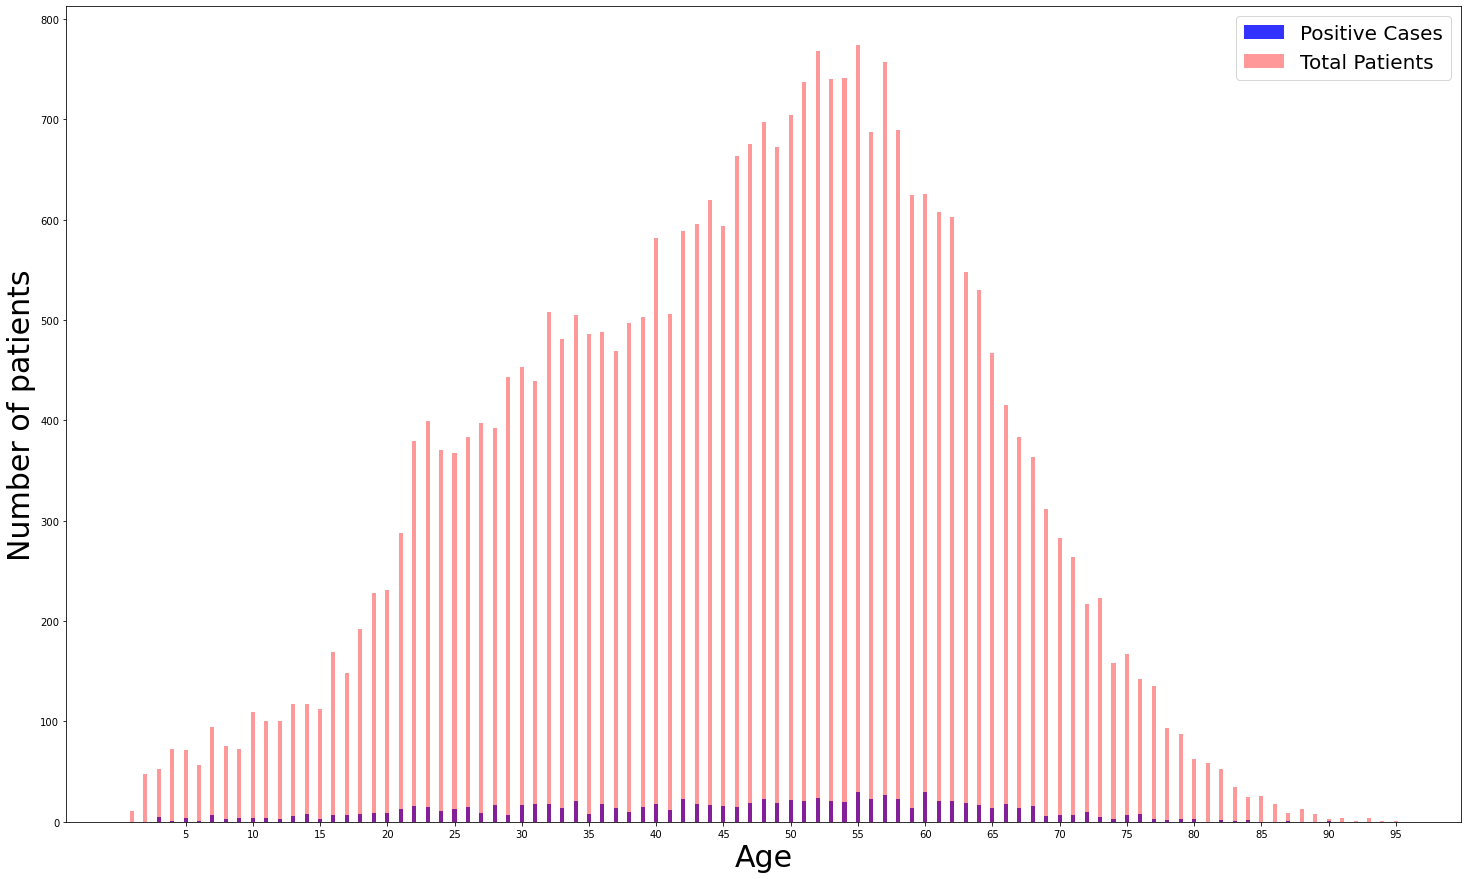

In [46]:
age = list(map_age_pneu.keys())
pneu_counts_by_age = [v[0] for v in map_age_pneu.values()]
total_counts_by_age = [v[1] for v in map_age_pneu.values()]
pneu_by_total_for_age = [round(((i/j)*100), 1) for i, j in zip(pneu_counts_by_age, total_counts_by_age)]

fig = plt.figure()
ax = fig.add_subplot(111)

_ = ax.bar(age, pneu_counts_by_age, color='blue', alpha=0.8, width=0.3, label='Positive Cases')
_ = ax.bar(age, total_counts_by_age, color='red', alpha=0.4, width=0.3, label='Total Patients')
_ = plt.xticks([age for age in unique_patients['Patient Age'].unique() if age % 5 == 0])
_ = plt.legend(prop={'size': 20})
_ = plt.xlabel('Age', fontsize=30)
_ = plt.ylabel('Number of patients', fontsize=30)

**As proposed above, the percentages of patients having pneumonia out of the total patients for the given age values are highest in the range [20, 70]. This further evidents that age is not a very strong factor apart from determining if a patient's age lies in the range of [20, 70] years.**

**Since the distribution of age follows a Gaussian Distribution (approximately), it's a good idea to determine the pearson correlation between age and presence/absence of pneumonia.**

In [47]:
pearson_corr_pneu_age = unique_patients['Patient Age'].corr(unique_patients['Pneumonia_Flag'], method='pearson')
spearman_corr_pneu_age = unique_patients['Patient Age'].corr(unique_patients['Pneumonia_Flag'], method='spearman')

print('Pearson correlation between the age and presence/absence of pnemonia is: ', pearson_corr_pneu_age)
print('Spearman correlation between the age and presence/absence of pnemonia is: ', spearman_corr_pneu_age)

Pearson correlation between the age and presence/absence of pnemonia is:  -0.008125153878550215
Spearman correlation between the age and presence/absence of pnemonia is:  -0.005428594526698982


**The Pearson correlation value of -0.008 suggests that the features `age` and `presence_of_pneumonia` are not linear related. The near zero value for the spearman correlation indicates that there is no monotonic relation between the previously stated features. This further evidents the argument that age is not a very impactful factor for the determination of positive/negative cases. Further evident from the scatter plot below.**

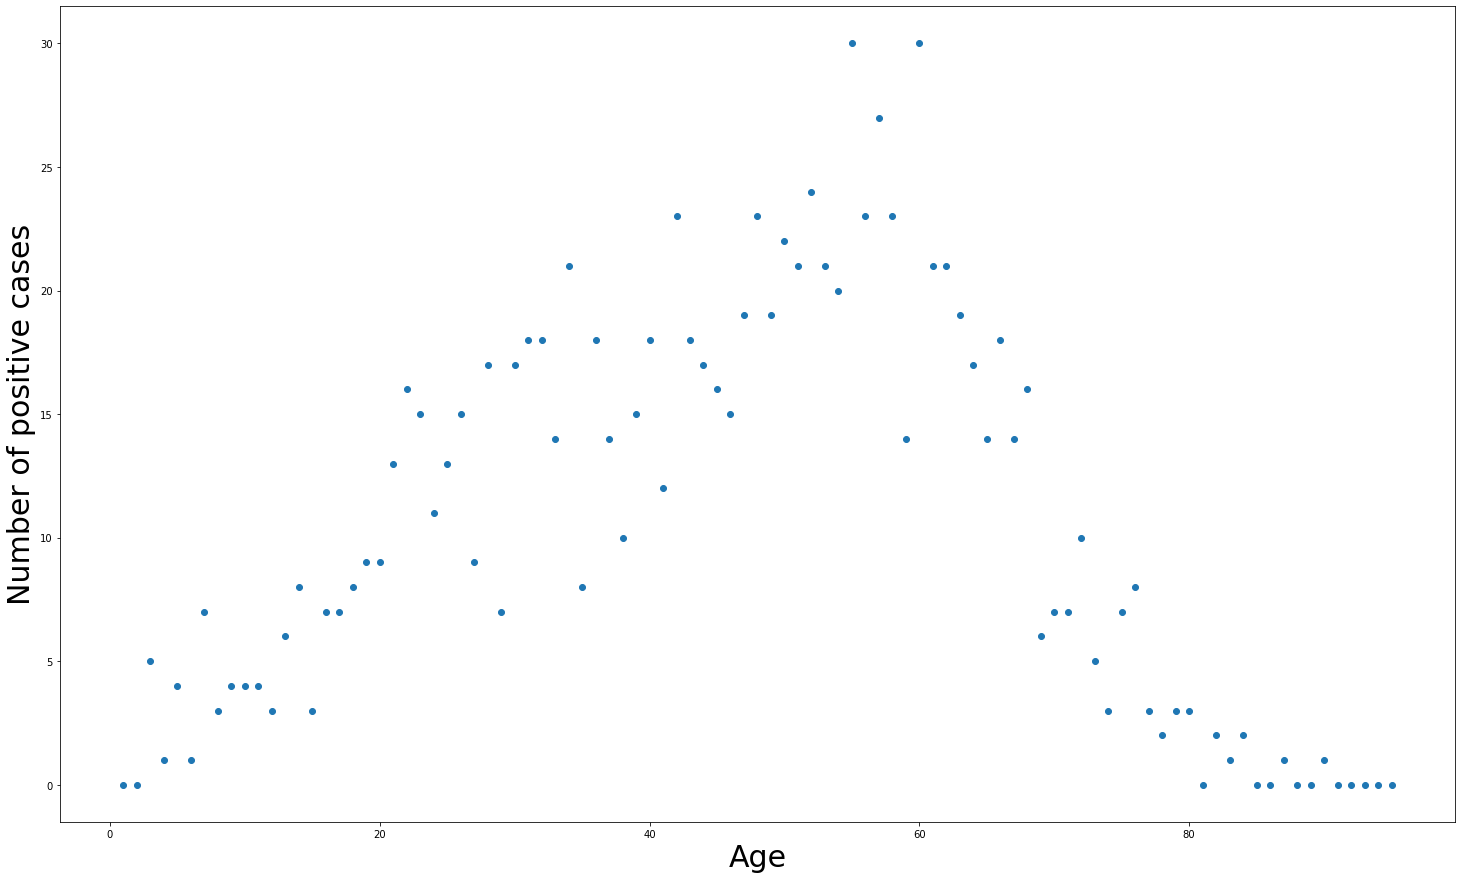

In [48]:
_ = plt.scatter(age, pneu_counts_by_age)
_ = plt.xlabel('Age', fontsize=30)
_ = plt.ylabel('Number of positive cases', fontsize=30)

**The scatter proves the values of pearson and spearman correlation values. The features `age` and `presence_of_pneumonia` are neither linearly not monotonically related.**

## *Working on `Patient Gender` feature*
(Will be addressed as *'feature of interest'* or `foe` in this section)

In [49]:
all_xray_df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,...,Atelectasis,Pneumothorax,Pleural_Thickening,Pneumonia,Fibrosis,Edema,Consolidation,No Finding,Num Symptoms,Pneumonia_Flag
0,00000001_000.png,[Cardiomegaly],0,1,58,0,0,2682,2749,0.143,...,0,0,0,0,0,0,0,0,3,0
1,00000001_001.png,"[Cardiomegaly, Emphysema]",1,1,58,0,0,2894,2729,0.143,...,0,0,0,0,0,0,0,0,3,0
2,00000001_002.png,"[Cardiomegaly, Effusion]",2,1,58,0,0,2500,2048,0.168,...,0,0,0,0,0,0,0,0,3,0
3,00000002_000.png,[No Finding],0,2,81,0,0,2500,2048,0.171,...,0,0,0,0,0,0,0,1,0,0
4,00000003_000.png,[Hernia],0,3,81,1,0,2582,2991,0.143,...,0,0,0,0,0,0,0,0,2,0


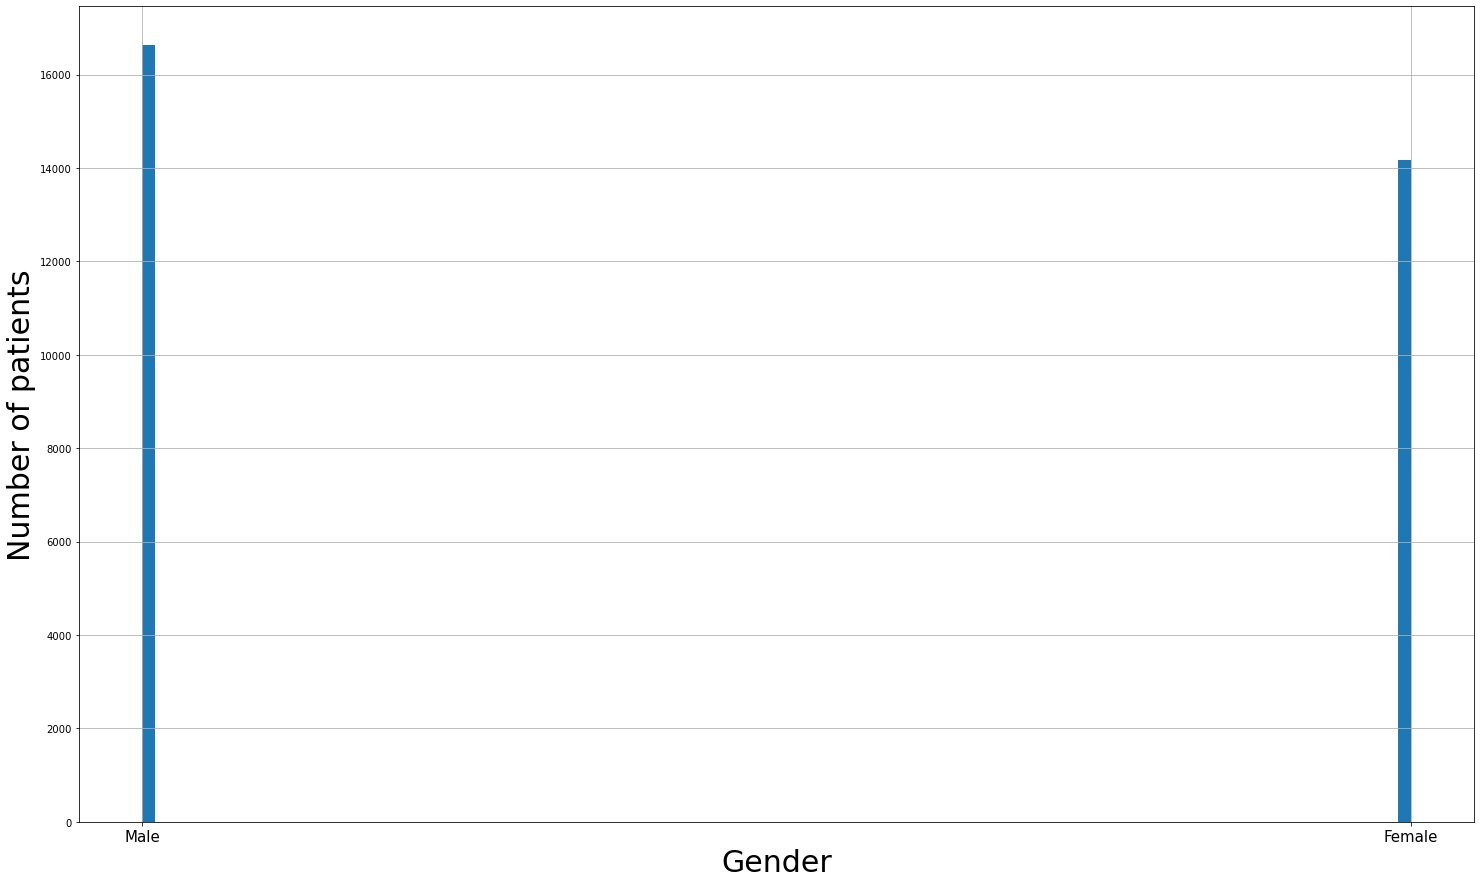

In [50]:
_ = unique_patients['Patient Gender'].hist(bins=100)
_ = plt.xticks([g for g in unique_patients['Patient Gender'].unique()], fontsize=15, labels=['Male', 'Female'])
_ = plt.xlabel('Gender', fontsize=30)
_ = plt.ylabel('Number of patients', fontsize=30)

**The dataset has almost equal number of male and female patients. This avoids the problem of data unbalancing.**

In [51]:
map_gender_pneu = dict(unique_patients.groupby('Patient Gender').apply(count_pneu_patients))

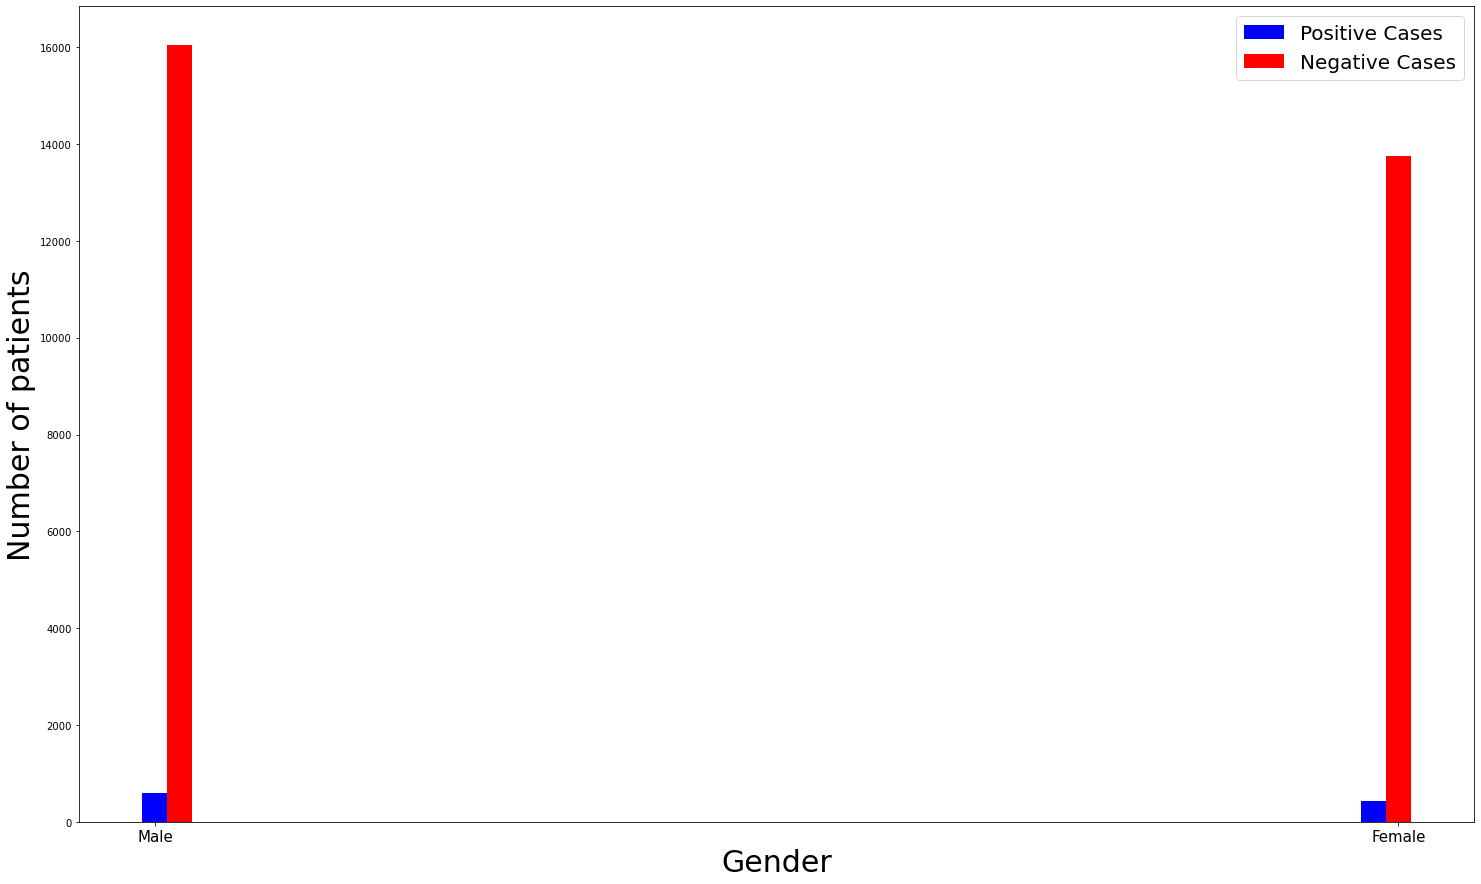

In [52]:
fig = plt.figure()
ax = fig.add_subplot(111)

_ = ax.hist(positive_cases['Patient Gender'], bins=50, align='left', color='blue', label='Positive Cases')
_ = ax.hist(negative_cases['Patient Gender'], bins=50, align='right', color='red', label='Negative Cases')
_ = plt.xticks([g for g in unique_patients['Patient Gender'].unique()], labels=['Male', 'Female'], fontsize=15)
_ = plt.xlabel('Gender', fontsize=30)
_ = plt.ylabel('Number of patients', fontsize=30)
_ = plt.legend(prop={'size': 20})

**The above graph shows how the number of negative cases (in red) and the number of positive cases (in blue) vary for both the genders. Both the genders have similar number of negative as well as positive cases. This makes the `Patient Gender` feature insignificant for the determination of presence of pneumonia. This is further analysed in the following cells.**

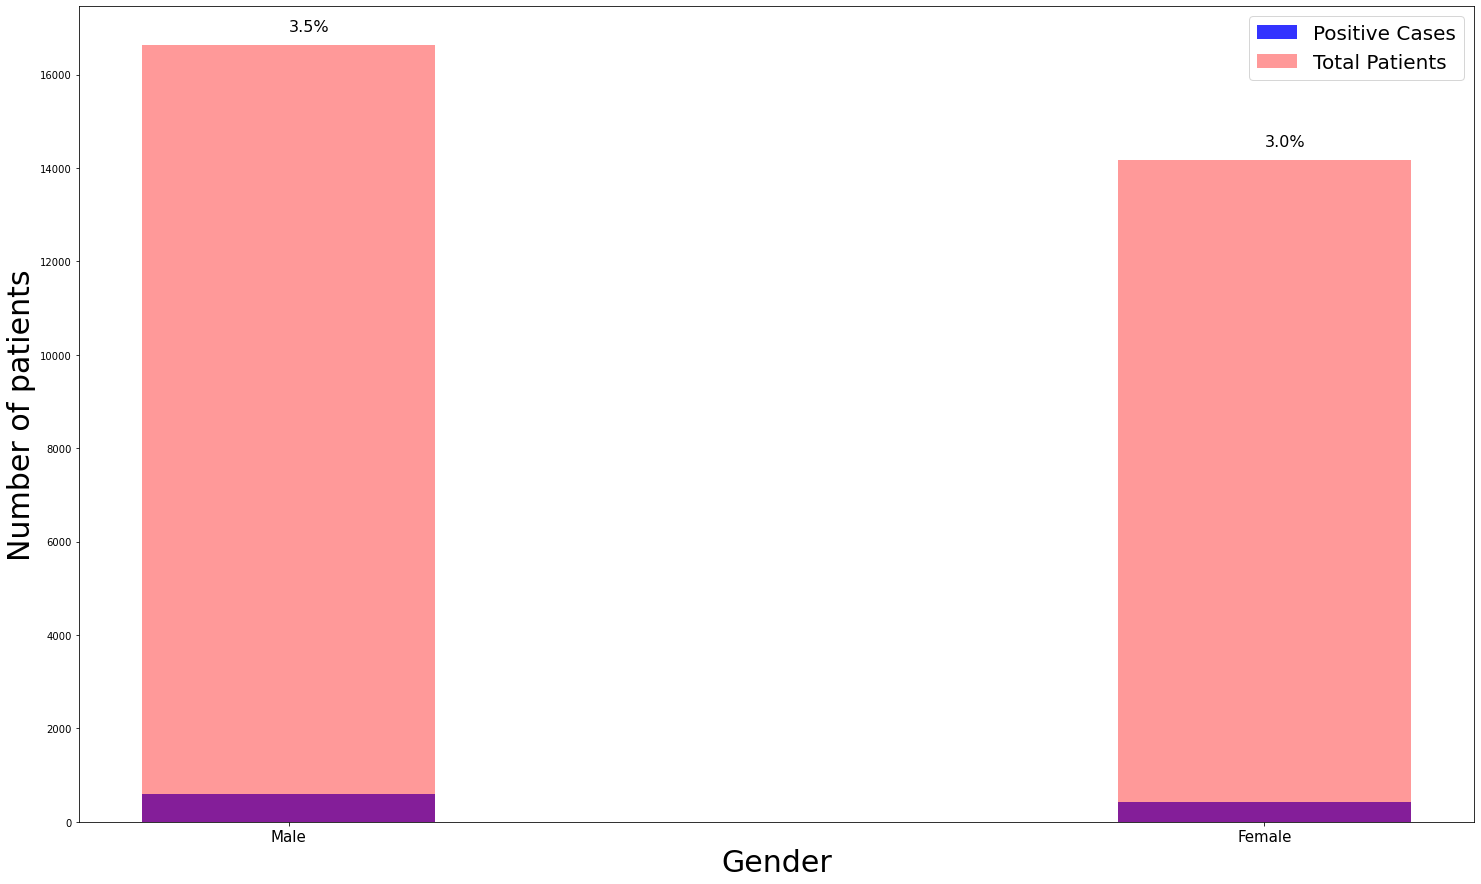

In [53]:
gender = list(map_gender_pneu.keys())
pneu_counts_by_gender = [v[0] for v in map_gender_pneu.values()]
total_counts_by_gender = [v[1] for v in map_gender_pneu.values()]
pneu_by_total_for_gender = [round(((i/j)*100), 1) for i, j in zip(pneu_counts_by_gender, total_counts_by_gender)]

fig = plt.figure()
ax = fig.add_subplot(111)

_ = ax.bar(gender, pneu_counts_by_gender, color='blue', alpha=0.8, width=0.3, label='Positive Cases')
_ = ax.bar(gender, total_counts_by_gender, color='red', alpha=0.4, width=0.3, label='Total Patients')
_ = plt.xticks([g for g in unique_patients['Patient Gender'].unique()], labels=['Male', 'Female'], fontsize=15)

for i in range(len(gender)):
    plt.annotate(str(pneu_by_total_for_gender[i])+'%',
        xy=(gender[i], total_counts_by_gender[i]+300),
        fontsize=16)

_ = plt.xlabel('Gender', fontsize=30)
_ = plt.ylabel('Number of patients', fontsize=30)
_ = plt.legend(prop={'size': 20})

**The above bar chart shows the percentage of positive cases out of total number of patients for each of the subcategory of gender viz. Male and Female. As evident from the graph, both the categories have highly similar value of the aforementioned percentage. This further consolidate the non-essentiality of the `Patient Gender` feature. The presence or absence of pneumonia does not depend on the gender of the patient under consideration. We would need more samples from the population to reject the null hypothesis.**

In [54]:
pearson_corr_pneu_gender = unique_patients['Patient Gender'].corr(unique_patients['Pneumonia_Flag'])
print('Pearson correlation between patient\'s gender and presence/absence of pneumonia is: ', pearson_corr_pneu_gender)

Pearson correlation between patient's gender and presence/absence of pneumonia is:  -0.01604088833917466


## *Working on `View Position` feature*
(Will be addressed as *'feature of interest'* or `foe` in this section)

In [55]:
all_xray_df['View Position'].value_counts()

0    67299
1    44805
Name: View Position, dtype: int64

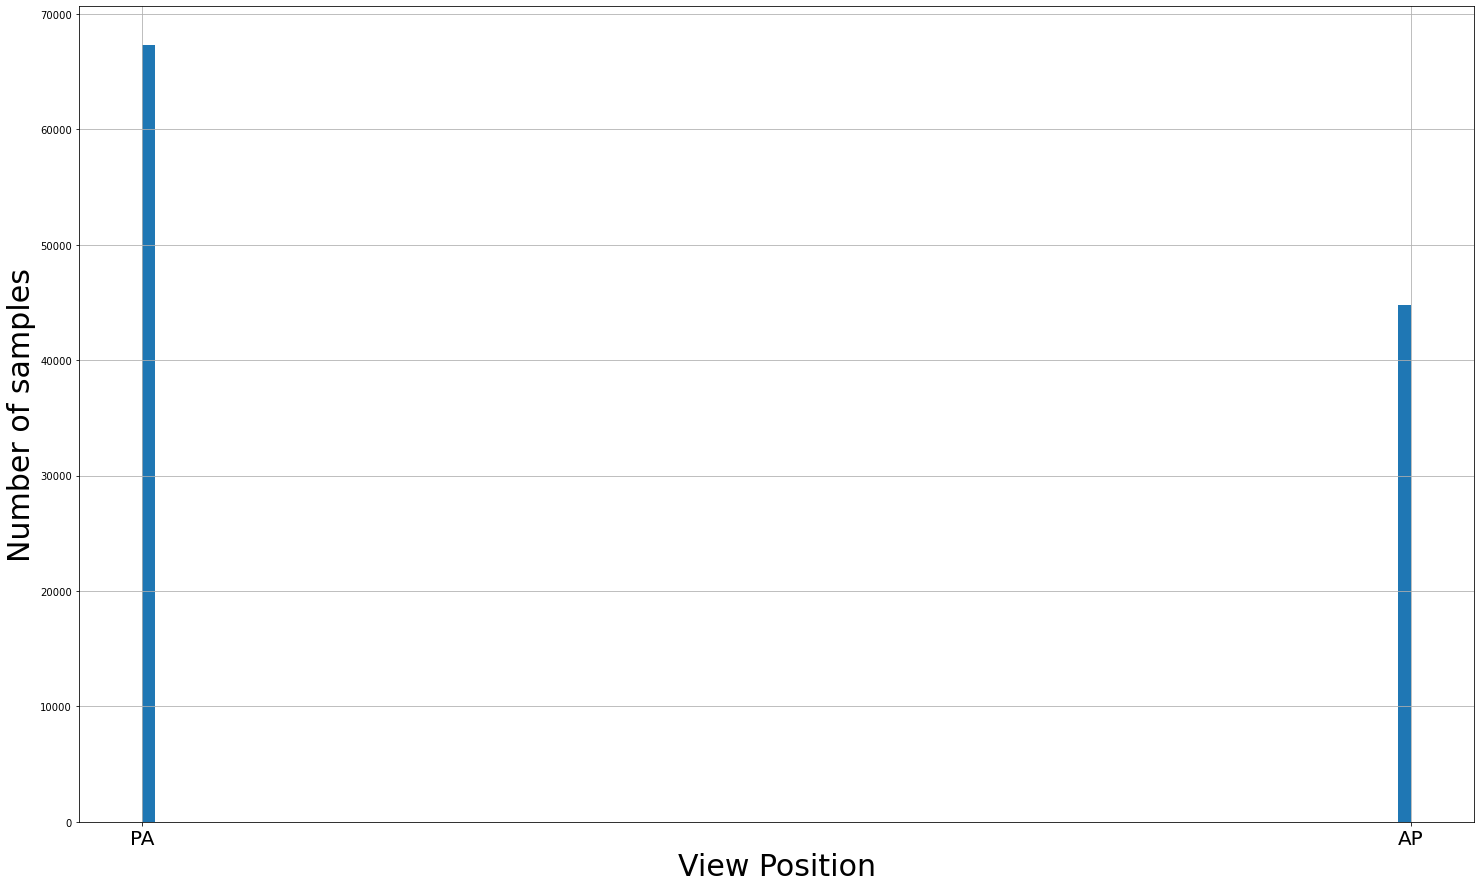

In [56]:
_ = all_xray_df['View Position'].hist(bins=100)
_ = plt.xticks([0, 1], fontsize=20, labels=['PA', 'AP'])
_ = plt.xlabel('View Position', fontsize=30)
_ = plt.ylabel('Number of samples', fontsize=30)

In [57]:
map_vp_pneu = dict(all_xray_df.groupby('View Position').apply(count_pneu_patients))

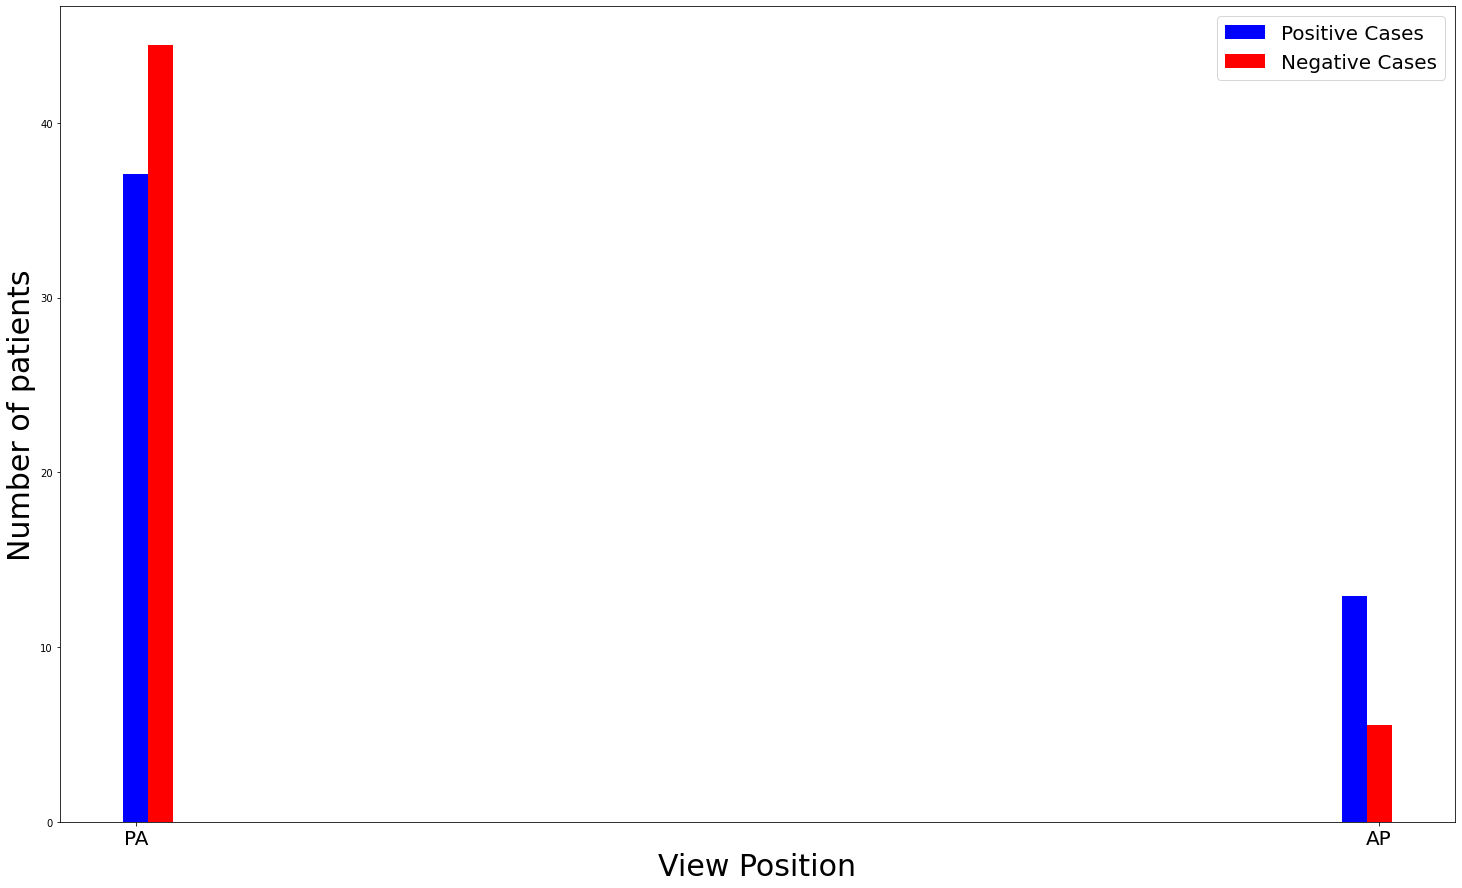

In [58]:
fig = plt.figure()
ax = fig.add_subplot(111)

_ = ax.hist(positive_cases['View Position'], bins=50, align='left', density=True, color='blue', label='Positive Cases')
_ = ax.hist(negative_cases['View Position'], bins=50, align='right', density=True, color='red', label='Negative Cases')
_ = plt.xticks([vp for vp in all_xray_df['View Position'].unique()], labels=['PA', 'AP'], fontsize=20)
_ = plt.legend(prop={'size': 20})
_ = plt.xlabel('View Position', fontsize=30)
_ = plt.ylabel('Number of patients', fontsize=30)

**The successing bar chart depicts the number of positve and negative cases for each type of visual positions. Evidently, `PA` comprises of larger part of the data seems to have more negative cases than its counterpart. Now this may be a matter of concern if this visual position is not much efficient in detecting the presence of pneumonia, this would lead to ignorance and ,hence, absence of treatment of patients having the disease but was weren't detected to have. In other words, for visual position `PA`, if it has a higher of false positive. The visual position `AP` seems to have higher number of positive cases than number of negative cases. This position is more efficient in detecting the presence of pneumonia, assuming there weren't any external and non-idle flaws in the process of determination.**

**This concludes that the type of `visual_position` has an effect on the determination of presence/absence of pneumonia and hence is a feature of significance.** 

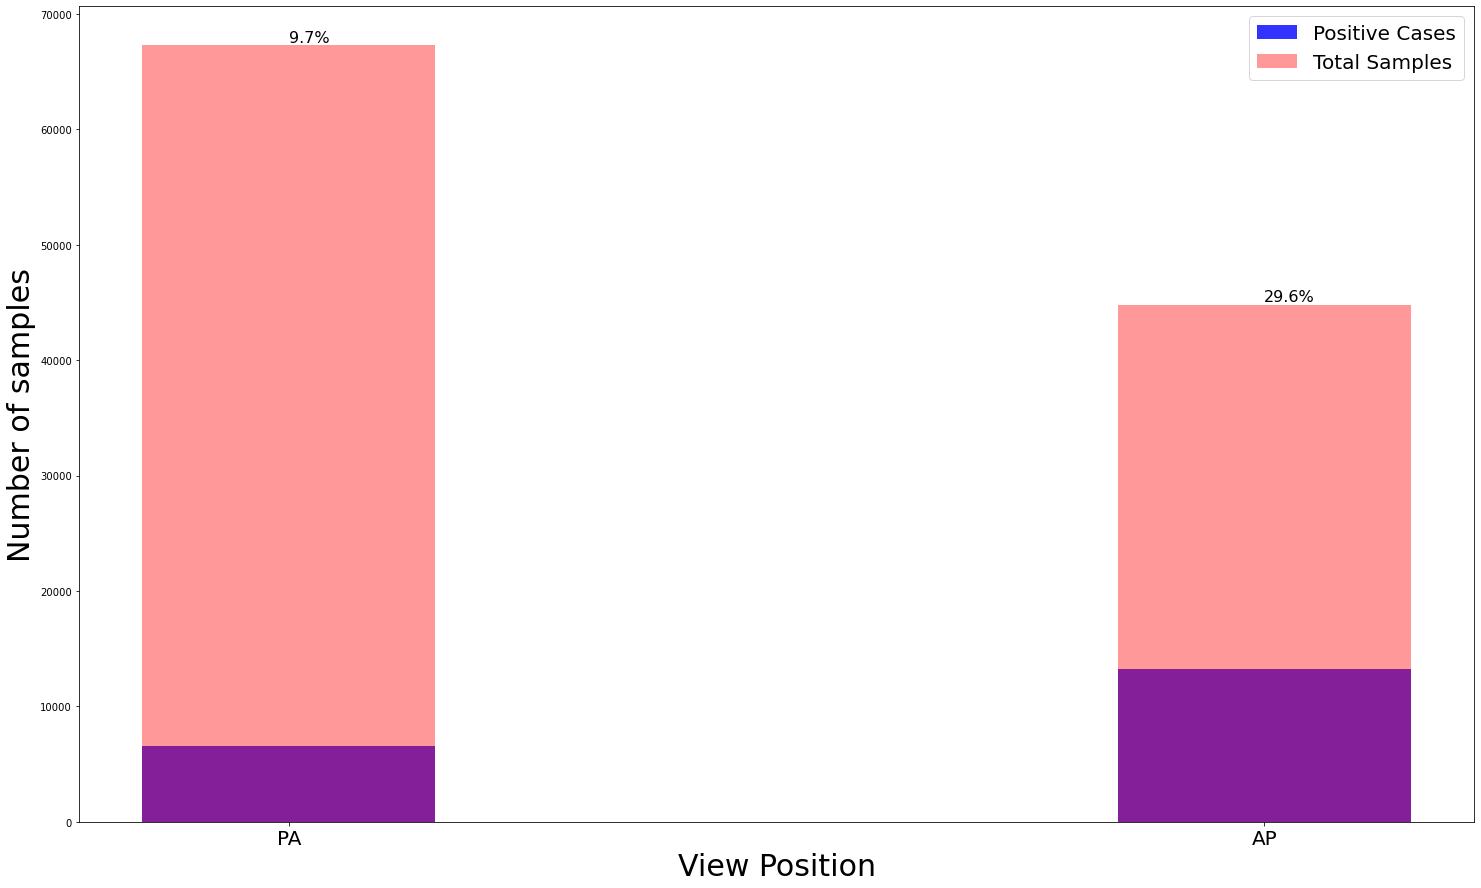

In [59]:
vp = list(map_vp_pneu.keys())
pneu_counts_by_vp = [v[0] for v in map_vp_pneu.values()]
total_counts_by_vp = [v[1] for v in map_vp_pneu.values()]
pneu_by_total_for_vp = [round(((i/j)*100), 1) for i, j in zip(pneu_counts_by_vp, total_counts_by_vp)]

fig = plt.figure()
ax = fig.add_subplot(111)

_ = ax.bar(vp, pneu_counts_by_vp, color='blue', alpha=0.8, width=0.3, label='Positive Cases')
_ = ax.bar(vp, total_counts_by_vp, color='red', alpha=0.4, width=0.3, label='Total Samples')
_ = plt.xticks([vp for vp in all_xray_df['View Position'].unique()], labels=['PA', 'AP'], fontsize=20)

for i in range(len(vp)):
    plt.annotate(str(pneu_by_total_for_vp[i])+'%',
        xy=(gender[i], total_counts_by_vp[i]+300),
        fontsize=16)
_ = plt.xlabel('View Position', fontsize=30)
_ = plt.ylabel('Number of samples', fontsize=30)
_ = plt.legend(prop={'size': 20})

**The above graph shows the percentage of positive cases out of total number of patients for each type of `visual_position`. As can be clearly seen, the `visual_position` 'AP' seems to higher percentage value than its counterpart.**

In [60]:
pearson_corr_pneu_vp = all_xray_df['View Position'].corr(all_xray_df['Pneumonia_Flag'])
print('Pearson correlation between view_position and presence/absence of pneumonia is: ', pearson_corr_pneu_vp)

Pearson correlation between view_position and presence/absence of pneumonia is:  0.2554089325317319


## Cleaning the dataset for the calculation of correlation matrix

In [61]:
features = all_xray_df.drop(['Patient ID', 'Image Index', 'Finding Labels', 'OriginalImage[Width', 'Height]',
                             'OriginalImagePixelSpacing[x', 'y]', 'Unnamed: 11', 'No Finding'], axis=1)

In [62]:
features.head()

,Follow-up #,Patient Age,Patient Gender,View Position,Cardiomegaly,Emphysema,Effusion,Hernia,Infiltration,Mass,Nodule,Atelectasis,Pneumothorax,Pleural_Thickening,Pneumonia,Fibrosis,Edema,Consolidation,Num Symptoms,Pneumonia_Flag
0,0,58,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0
1,1,58,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,3,0
2,2,58,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,3,0
3,0,81,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,81,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,0


In [63]:
features_corr_mat_pearson = features.corr(method='pearson')
features_corr_mat_kendall = features.corr(method='kendall')
features_corr_mat_spearman = features.corr(method='spearman')

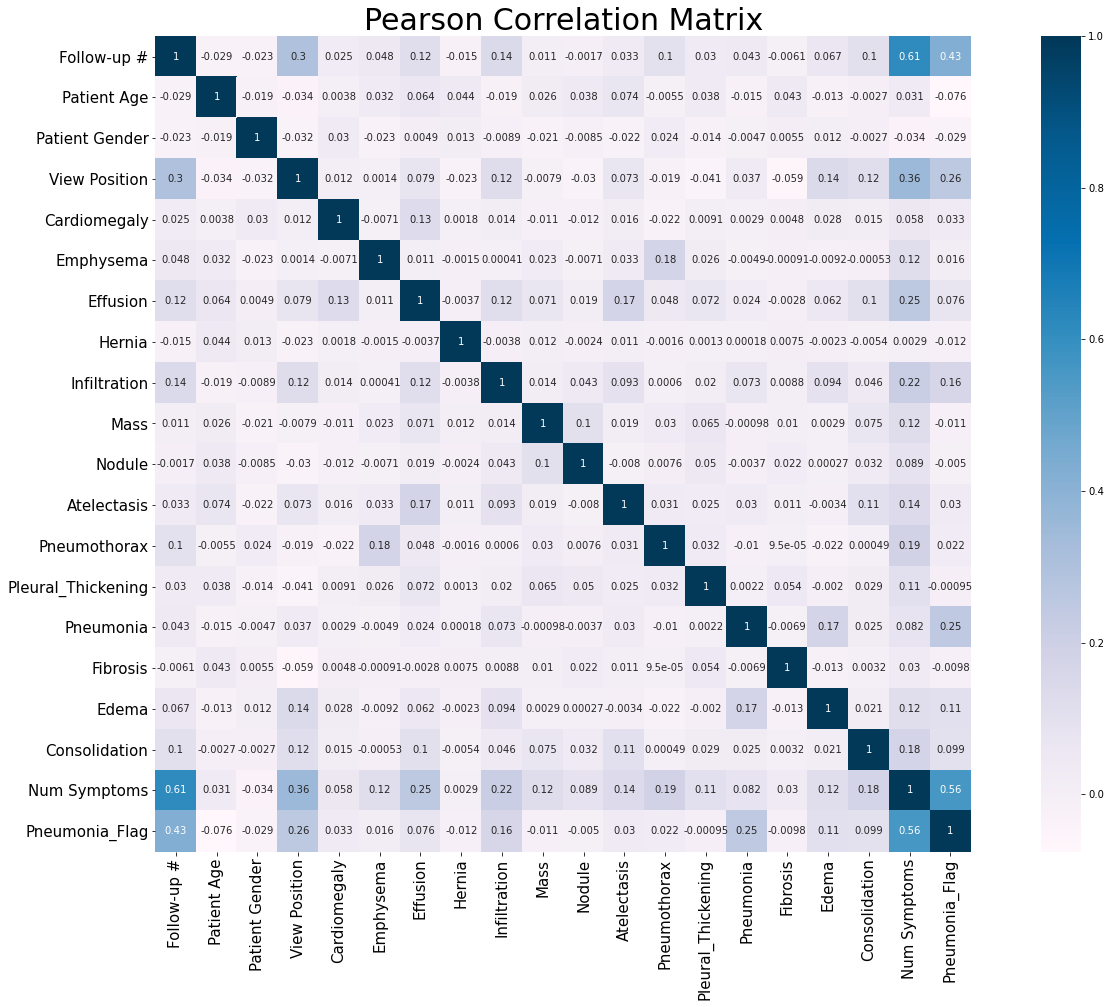

In [64]:
_ = sns.heatmap(features_corr_mat_pearson, cmap='PuBu', annot=True, square=True)
_ = plt.xticks(fontsize=15)
_ = plt.yticks(fontsize=15)
_ = plt.title('Pearson Correlation Matrix', fontsize=30)

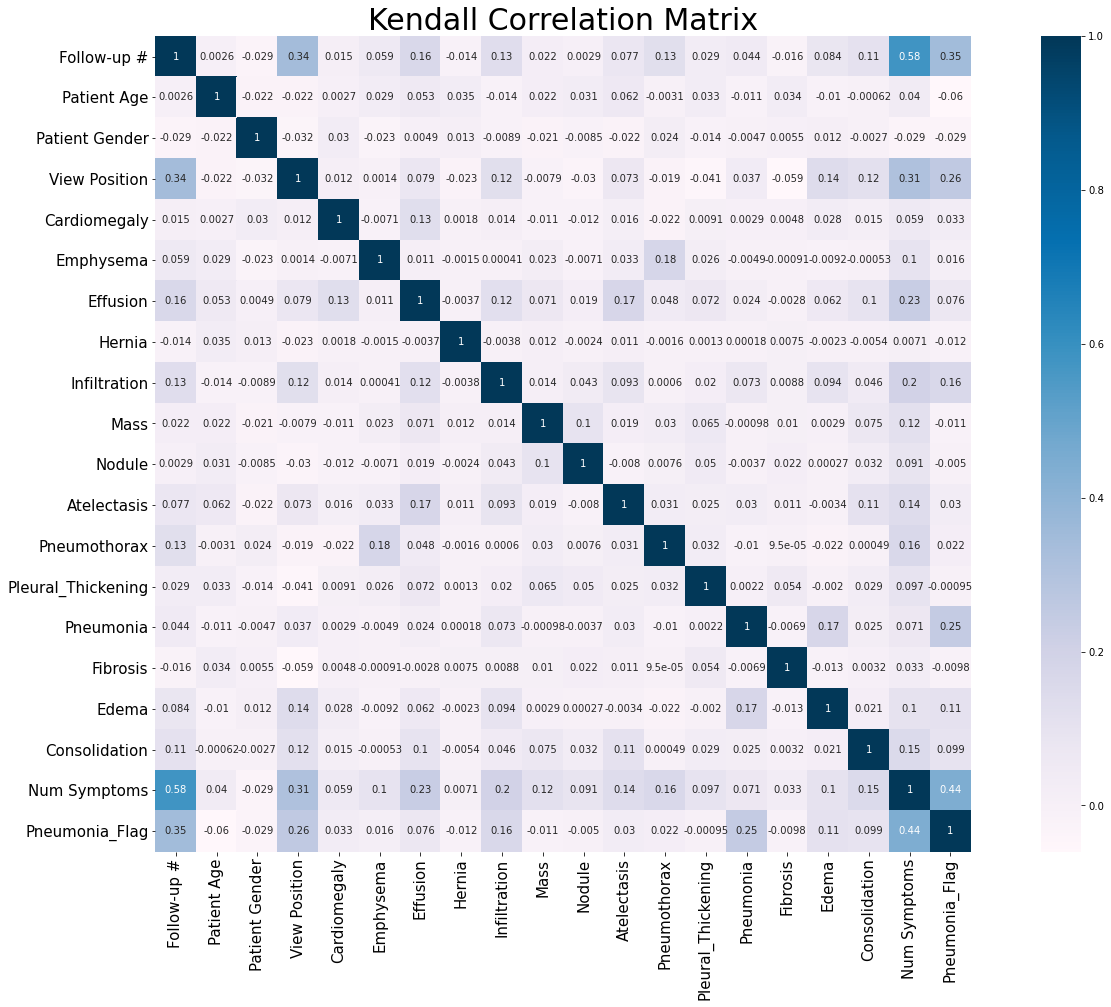

In [65]:
_ = sns.heatmap(features_corr_mat_kendall, cmap='PuBu', annot=True, square=True)
_ = plt.xticks(fontsize=15)
_ = plt.yticks(fontsize=15)
_ = plt.title('Kendall Correlation Matrix', fontsize=30)

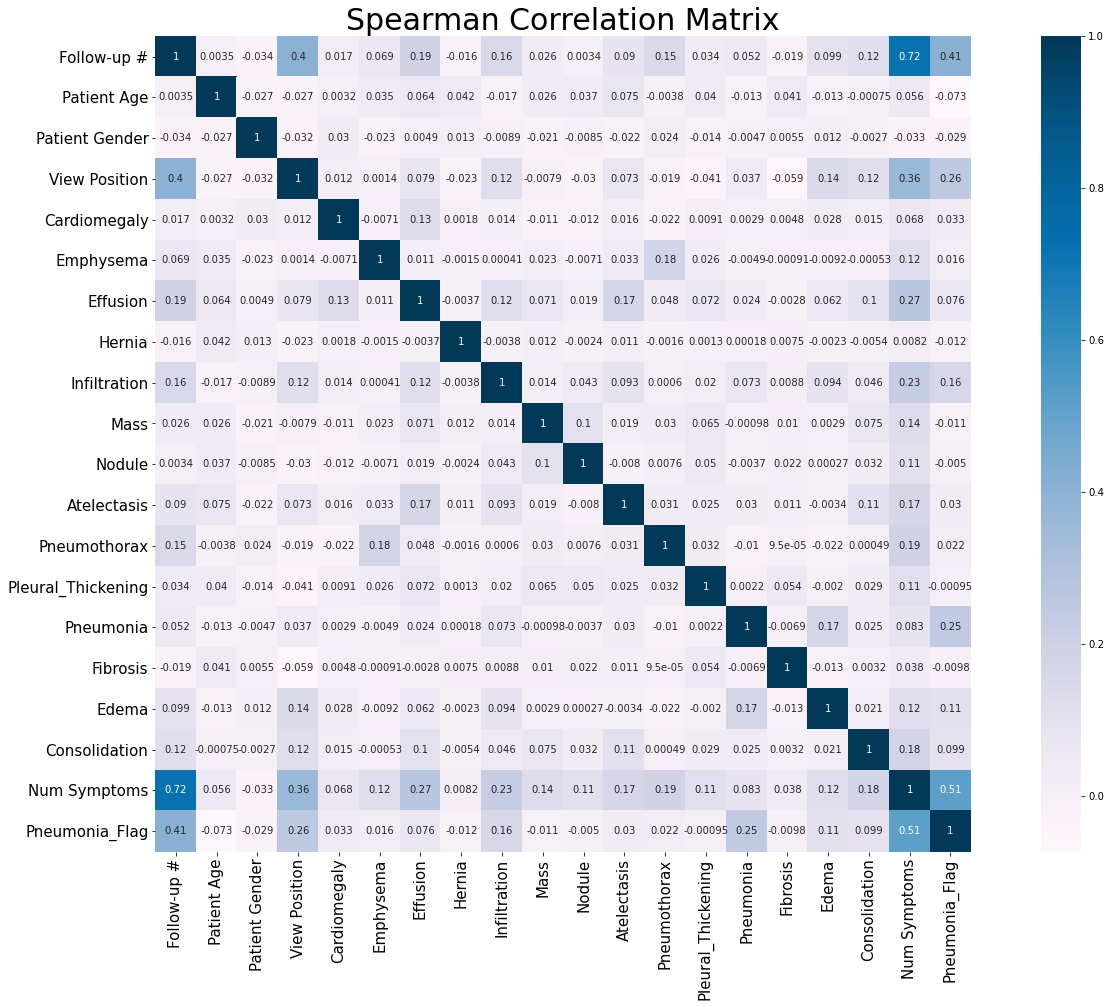

In [66]:
_ = sns.heatmap(features_corr_mat_spearman, cmap='PuBu', annot=True, square=True)
_ = plt.xticks(fontsize=15)
_ = plt.yticks(fontsize=15)
_ = plt.title('Spearman Correlation Matrix', fontsize=30)

In [67]:
# Taking out from each correlation matrix, the values onlu for Pneumonia

pneu_features_corr_mat_pearson = features_corr_mat_pearson.iloc[-1, :]
pneu_features_corr_mat_kendall = features_corr_mat_kendall.iloc[-1, :]
pneu_features_corr_mat_spearman = features_corr_mat_spearman.iloc[-1, :]
pneu_features = pd.concat([pneu_features_corr_mat_pearson,
                  pneu_features_corr_mat_kendall,
                  pneu_features_corr_mat_spearman], axis=1)
pneu_features = pneu_features.set_axis(['Pearson', 'Kendall', 'Spearman'], axis=1)

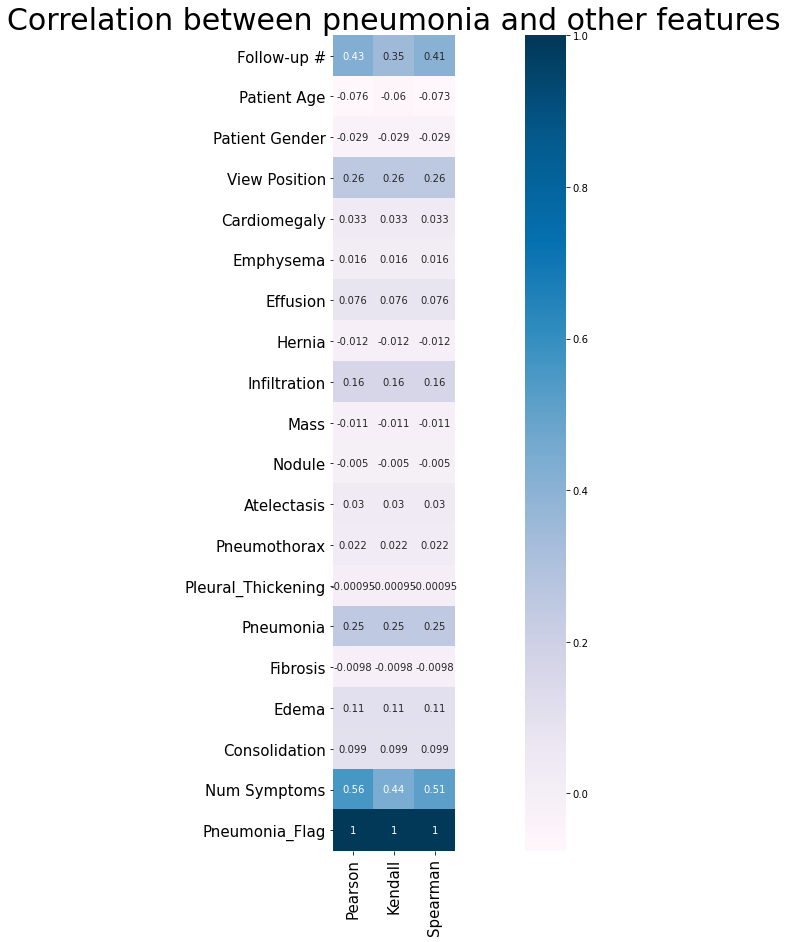

In [68]:
_ = sns.heatmap(pneu_features, cmap='PuBu', annot=True, square=True)
_ = plt.xticks(fontsize=15)
_ = plt.yticks(fontsize=15)
_ = plt.title('Correlation between pneumonia and other features', fontsize=30)

***Analysis of various correlation values between presence/absence of pneumonia and other features:***

Notation:
* Pearson Correlation Value = pcv
* Kendall Correlation Value = kcv
* Spearman Correlation Value = scv

* **Follow-up #**:
    * The significantly high and positive values of the pcv, kcv and scv indicates the linear as well as monotonic relation. Hence, this feature is important for the determination of pneumonia.
* **Patient Age**:
    * The near zero values of pcv, kcv, and scv indicates that there is neither linear nor monotonic relation. Hence, this feature is not significant for the determination of pneumonia.
* **Patient Gender**:
    * The near zero values of pcv, kcv, and scv indicates that there is neither linear nor monotonic relation. These values are worse than those `Patient Age` feature. Hence, this feature is not significant for the determination of pneumonia.
* **View Position**:
    * The positively high values of pcv, kcv, and scv indicates that this feature plays a crucial role in the determination of pneumonia.
* **Cardiomegaly** to **Consolidation**:
    * The values of pcv, kcv, and scv for these features helps in finding those which are more typical to be seen along with pneumonia. *Infiltration*, *Edema*, *Consolidation* and *Effusion* are some major symptoms with high tendency to occur along with penumonia.
* **Num Symptoms**:
    * The significantly high and positive values of the pcv, kcv and scv indicates the linear as well as monotonic relation. Hence, this feature is important for the determination of pneumonia.